In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
from numpy import random

/opt/homebrew/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(99):
        for j in range(i+1,100):
            G.add_edge(i, j, weight=1000)
    G.add_edge(0,1,weight=1000)
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    for i in range(2, 300):
        G.add_edge(i, 0, weight=700)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=800)    
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    for i in range(2, 1000):
        G.add_edge(i, 0, weight=500)
        G.add_edge(i, 1, weight=1000)
    G.add_edge(0,1,weight=415)

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [5]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    
    # list of penguins
    penguin_list = list(G.nodes)
    # sort edges by weight
    # dictionary edge weight: vertices that make up that edge
    weight_dict = {}
    for edge in G.edges:
        key = G.get_edge_data(edge[0], edge[1])['weight']
        if key in weight_dict.keys():
            weight_dict[key].append(edge)
        else:
            weight_dict[key] = [edge]
    # list storing sorted keys descending
    weight_dict_keys_sorted = sorted(weight_dict.keys(), reverse=True)
    
    # starting num nodes
    num_groups = G.number_of_nodes() * 2 // 3
    group_dict = {} # group_num : (group_size, group_weight, [])
    
    # creating the groups
    for i in range(1, num_groups + 1, 1):
        group_dict[i] = [0, 0, []]
    
    # iterating through edge weights in weight_dict
    for weight in weight_dict_keys_sorted:
        curr_edges = weight_dict[weight] # current edges starting from heaviest edge
        for edge in curr_edges:
            # Penguin 0
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_0 = edge[0]
            smallest_weight_added_id_penguin_0 = smallest_groups_list[0]
            smallest_weight_added_penguin_0 = float('inf')
            # Find the group ID with the smallest weight added and place it in smallest_weight_added_id
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_0)
                if weight_contributed < smallest_weight_added_penguin_0:
                    smallest_weight_added_penguin_0 = weight_contributed
                    smallest_weight_added_id_penguin_0 = group
            # Add penguin 0 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_0 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_0][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_0][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_0][2].append(penguin_0) # adding penguin_0 to group_dict
                G.nodes[penguin_0]['team'] = smallest_weight_added_id_penguin_0
                penguin_list.remove(penguin_0)
            # Penguin 1
            group_size = get_group_size(group_dict) # group_size : [group_id's]
            group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
            smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
            penguin_1 = edge[0]
            smallest_weight_added_id_penguin_1 = smallest_groups_list[0]
            smallest_weight_added_penguin_1 = float('inf')
            for group in smallest_groups_list:
                weight_contributed = check_weight_contributed(G, group_dict, group_dict[group][2], penguin_1)
                if weight_contributed < smallest_weight_added_penguin_1:
                    smallest_weight_added_penguin_1 = weight_contributed
                    smallest_weight_added_id_penguin_1 = group
            # Add penguin 1 to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
            if penguin_1 in penguin_list:
                group_dict[smallest_weight_added_id_penguin_1][0] += 1 # increasing group size
                group_dict[smallest_weight_added_id_penguin_1][1] += smallest_weight_added_penguin_0 # adding to the total weight of the group
                group_dict[smallest_weight_added_id_penguin_1][2].append(penguin_1) # adding penguin_1 to group_dict
                G.nodes[penguin_1]['team'] = smallest_weight_added_id_penguin_1
                penguin_list.remove(penguin_1)
    # dealing with leftover penguins
    for penguin in penguin_list:
        group_size = get_group_size(group_dict) # group_size : [group_id's]
        group_size_keys_sorted = sorted(group_size.keys(), reverse=False) # sorting the size of each group ascending
        smallest_groups_list = group_size[group_size_keys_sorted[0]] # the list of group_id's corresponding to the smallest weight
        # Add penguin to the group and add it to all the dictionaries/lists needed, and remove it from all the dictionaries/lists needed
        group_dict[smallest_groups_list[0]][0] += 1 # increasing group size
        group_dict[smallest_groups_list[0]][2].append(penguin) # adding penguin to group_dict
        G.nodes[penguin]['team'] = smallest_groups_list[0]
    print(penguin_list)
    pass

def get_group_size(group_dict: dict) -> dict:
    """
    get group size
    """
    group_size = {} # group size : [group_id's]
    for group_id in group_dict:
        value = group_dict[group_id]
        if value[0] in group_size:
            group_size[value[0]].append(group_id)
        else:
            group_size[value[0]] = [group_id]
    return group_size

def check_weight_contributed(G: nx.graph, group_dict: dict, penguins_in_group: list, incoming_penguin: int) -> int:
    """
    returns new weight of the group after adding incoming_penguin
    """
    total_weight = 0
    for penguin in penguins_in_group:
        edge_data = G.get_edge_data(incoming_penguin, penguin)
        if edge_data:
            total_weight += edge_data['weight']
    return total_weight

[99]


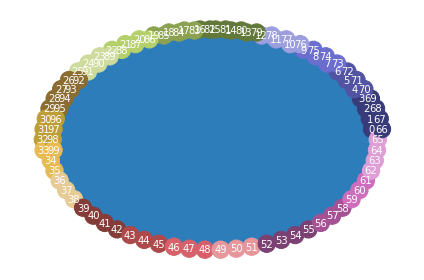

2.1464357978625624e+16

In [6]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [7]:
run(solve, 'small.in', 'small.out')

[99]
small.in: cost 2.1464357978625624e+16


In [ ]:
run_all(solve, 'input', 'output')
tar('output')

  0%|                                           | 1/780 [00:00<02:47,  4.65it/s]

[5, 16, 18, 20, 21, 23, 26, 30, 34, 39, 48, 51, 52, 56, 58, 65, 67, 68, 69, 71, 72, 78, 79, 83, 89, 90, 92, 93, 95, 96, 100, 107, 111, 112, 115, 117, 118, 119, 123, 124, 130, 131, 132, 133, 135, 136, 138, 146, 148, 149, 152, 156, 160, 163, 166, 170, 171, 173, 180, 184, 185, 186, 188, 190, 191, 197, 198, 199, 204, 205, 207, 212, 215, 218, 220, 223, 224, 226, 230, 231, 232, 234, 235, 237, 239, 247, 248, 251, 252, 254, 256, 258, 260, 261, 262, 266, 268, 270, 272, 273, 275, 277, 278, 280, 282, 285, 287, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 306, 307, 310, 313, 318, 320, 325, 329, 332, 334, 337, 339, 341, 342, 343, 345, 346, 349, 355, 359, 361, 362, 363, 364, 367, 369, 372, 373, 375, 376, 380, 381, 384, 387, 389, 390, 392, 399, 403, 408, 409, 410, 411, 413, 416, 423, 425, 427, 434, 436, 437, 438, 439, 442, 444, 449, 450, 452, 455, 459, 465, 468, 470, 472, 473, 475, 476, 478, 479, 480, 482, 484, 485, 486, 488, 489, 490, 491, 492, 494, 496, 497, 498, 499, 500, 501, 504, 505, 506, 

  0%|▏                                          | 3/780 [00:00<02:26,  5.32it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

  1%|▎                                          | 5/780 [00:01<03:08,  4.10it/s]

[999]
input/large59.in: cost 4.169293549452359e+146
[99]
input/small150.in: cost 2.1464357978592204e+16


  1%|▍                                          | 7/780 [00:03<09:22,  1.38it/s]

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236

  1%|▍                                          | 8/780 [00:04<06:52,  1.87it/s]

[99]
input/small197.in: cost 2.1464357978591624e+16
[0, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small206.in: cost 2.146435797860155e+16


  1%|▌                                         | 10/780 [00:06<11:29,  1.12it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

  2%|▋                                         | 12/780 [00:07<09:01,  1.42it/s]

[289, 291, 296, 297, 298, 299]
input/medium7.in: cost 2.6881171418161357e+45
[99]
input/small257.in: cost 2.1464357978609948e+16


  2%|▋                                         | 13/780 [00:09<13:39,  1.07s/it]

[997, 998, 999]
input/large180.in: cost 4.169293549452359e+146


  2%|▊                                         | 15/780 [00:13<16:49,  1.32s/it]

[2, 18, 30, 67, 70, 155, 225, 288, 289, 297, 338, 364, 454, 471, 520, 531, 592, 612, 632, 664, 672, 709, 741, 749, 751, 758, 780, 782, 794, 811, 816, 821, 834, 847, 852, 859, 860, 861, 876, 877, 880, 884, 885, 887, 889, 892, 896, 898, 899, 905, 907, 910, 912, 914, 915, 918, 921, 922, 923, 925, 927, 931, 933, 934, 936, 937, 945, 947, 948, 951, 953, 955, 957, 959, 960, 961, 963, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large211.in: cost 4.169293549452359e+146
[99]
input/small135.in: cost 2.146435797859313e+16


  2%|▉                                         | 17/780 [00:13<09:36,  1.32it/s]

[98, 99]
input/small68.in: cost 2.146435797859168e+16
[299]
input/medium249.in: cost 2.6881171418161357e+45


  2%|█                                         | 19/780 [00:14<06:32,  1.94it/s]

[83, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,

  3%|█                                         | 20/780 [00:14<05:32,  2.29it/s]

[140, 233, 247, 249, 254, 258, 265, 273, 274, 277, 283, 288, 292, 293, 294, 296, 297, 298, 299]
input/medium218.in: cost 2.6881171418161357e+45


  3%|█▏                                        | 21/780 [00:14<04:44,  2.67it/s]

[257, 262, 265, 266, 271, 273, 274, 280, 281, 282, 284, 288, 289, 294, 295, 296, 297, 298, 299]
input/medium189.in: cost 2.6881171418161357e+45
[70, 76, 79, 92, 93, 94, 97, 98, 99]
input/small39.in: cost 2.14643579785944e+16


  3%|█▎                                        | 24/780 [00:15<03:34,  3.52it/s]

[999]
input/large122.in: cost 4.169293549452359e+146
[294, 295, 296, 297, 298, 299]
input/medium84.in: cost 2.6881171418161357e+45


  3%|█▎                                        | 25/780 [00:16<05:35,  2.25it/s]

[299]
input/medium26.in: cost 2.6881171418161357e+45
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

  3%|█▍                                        | 27/780 [00:16<04:03,  3.09it/s]

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium43.in: cost 2.6881171418161357e+45


  4%|█▌                                        | 28/780 [00:17<05:48,  2.16it/s]

[296, 297, 298, 299]
input/medium12.in: cost 2.6881171418161357e+45
[152, 155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245, 248, 251, 254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284, 287, 290, 293, 296, 299]
input/medium53.in: cost 2.6881171418161357e+45


  4%|█▌                                        | 30/780 [00:18<05:52,  2.13it/s]

[283, 292, 296, 299]
input/medium67.in: cost 2.6881171418161357e+45


  4%|█▋                                        | 31/780 [00:18<06:13,  2.01it/s]

[291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium36.in: cost 2.6881171418161357e+45


  4%|█▋                                        | 32/780 [00:19<05:26,  2.29it/s]

[299]
input/medium94.in: cost 2.6881171418161357e+45


  4%|█▊                                        | 34/780 [00:21<09:17,  1.34it/s]

[999]
input/large132.in: cost 4.169293549452359e+146
[99]
input/small174.in: cost 2.1464357978592264e+16


  4%|█▉                                        | 35/780 [00:22<07:15,  1.71it/s]

[99]
input/small29.in: cost 2.1464357978596164e+16


  5%|█▉                                        | 37/780 [00:22<05:31,  2.24it/s]

[284, 285, 290, 291, 292, 295, 297, 298, 299]
input/medium199.in: cost 2.6881171418161357e+45
[190, 212, 224, 228, 231, 236, 241, 242, 243, 244, 249, 250, 251, 252, 258, 259, 260, 261, 264, 266, 270, 273, 275, 276, 277, 278, 279, 280, 281, 282, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium208.in: cost 2.6881171418161357e+45


  5%|██                                        | 38/780 [00:25<13:13,  1.07s/it]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

  5%|██▏                                       | 41/780 [00:25<06:46,  1.82it/s]

[280, 289, 291, 293, 294, 295, 297, 298, 299]
input/medium259.in: cost 2.6881171418161357e+45
[99]
input/small78.in: cost 2.1464357978608624e+16


  5%|██▎                                       | 42/780 [00:27<10:28,  1.17it/s]

[477, 531, 535, 564, 576, 592, 632, 688, 696, 707, 715, 718, 741, 758, 771, 796, 804, 820, 822, 828, 830, 841, 845, 858, 859, 863, 864, 868, 870, 871, 873, 880, 881, 882, 895, 896, 897, 898, 899, 902, 903, 908, 909, 913, 915, 916, 919, 920, 925, 926, 932, 935, 936, 937, 938, 939, 940, 942, 944, 946, 947, 951, 954, 956, 957, 958, 959, 960, 963, 964, 965, 966, 967, 968, 971, 973, 974, 976, 977, 978, 980, 981, 982, 983, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large201.in: cost 4.169293549452359e+146


  6%|██▎                                       | 43/780 [00:30<18:11,  1.48s/it]

[0, 785, 849, 864, 872, 873, 885, 889, 897, 902, 907, 931, 936, 938, 939, 940, 941, 944, 946, 949, 951, 959, 965, 966, 969, 971, 973, 975, 976, 978, 979, 981, 982, 983, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large190.in: cost 4.169293549452359e+146
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small247.in: cost 2.1464357978600124e+16


  6%|██▌                                       | 47/780 [00:34<12:32,  1.03s/it]

[902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large250.in: cost 4.169293549452359e+146
[92, 93, 94, 95, 96, 97, 98, 99]
input/small216.in: cost 2.1464357978591624e+16
[99]
input/small187.in: cost 2.1464357978594052e+16


  6%|██▌                                       | 48/780 [00:34<10:17,  1.19it/s]

[99]
input/small111.in: cost 2.146435797859638e+16


  6%|██▋                                       | 49/780 [00:37<16:59,  1.39s/it]

[999]
input/large157.in: cost 4.169293549452359e+146


  7%|██▋                                       | 51/780 [00:39<13:30,  1.11s/it]

[461, 474, 476, 478, 481, 485, 486, 487, 488, 490, 491, 492, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681,

  7%|██▊                                       | 52/780 [00:43<21:31,  1.77s/it]

[810, 844, 851, 859, 874, 875, 896, 902, 903, 905, 915, 918, 919, 920, 929, 935, 938, 939, 945, 947, 948, 949, 951, 953, 955, 956, 958, 959, 960, 961, 965, 966, 970, 971, 972, 973, 974, 975, 978, 980, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 998, 999]
input/large49.in: cost 4.169293549452359e+146


  7%|██▉                                       | 54/780 [00:43<11:57,  1.01it/s]

[0, 2, 3, 4, 6, 15, 18, 31, 34, 50, 53, 56, 58, 79, 82, 92, 98, 116, 125, 126, 127, 134, 136, 138, 139, 141, 149, 160, 171, 179, 187, 191, 194, 196, 197, 198, 203, 208, 221, 224, 227, 230, 234, 239, 243, 245, 247, 255, 265, 266, 267, 268, 270, 271, 276, 283, 287, 291, 299, 307, 308, 310, 311, 315, 325, 329, 332, 335, 338, 339, 341, 342, 343, 344, 350, 351, 360, 362, 365, 390, 395, 397, 399, 403, 404, 406, 410, 414, 416, 417, 418, 422, 423, 427, 431, 434, 437, 441, 444, 449, 451, 458, 463, 466, 473, 476, 479, 480, 482, 488, 491, 493, 494, 495, 497, 505, 508, 510, 511, 513, 515, 517, 518, 521, 522, 524, 526, 530, 531, 532, 536, 540, 541, 544, 549, 551, 553, 558, 559, 560, 562, 567, 568, 571, 575, 576, 580, 581, 583, 584, 586, 588, 589, 590, 595, 597, 599, 601, 602, 603, 604, 606, 610, 617, 618, 619, 620, 624, 625, 627, 630, 631, 635, 638, 639, 640, 641, 642, 643, 644, 645, 646, 648, 652, 653, 657, 658, 659, 664, 665, 669, 670, 673, 674, 675, 676, 677, 679, 681, 682, 684, 687, 692, 693, 6

  7%|███                                       | 56/780 [00:44<07:37,  1.58it/s]

[993, 994, 995, 999]
input/large235.in: cost 4.169293549452359e+146
[99]
input/small253.in: cost 2.1464357978592256e+16


  7%|███                                       | 57/780 [00:44<07:31,  1.60it/s]

[299]
input/medium3.in: cost 2.6881171418161357e+45


  7%|███                                       | 58/780 [00:48<20:02,  1.67s/it]

[999]
input/large215.in: cost 4.169293549452359e+146


  8%|███▏                                      | 60/780 [00:49<11:45,  1.02it/s]

[999]
input/large184.in: cost 4.169293549452359e+146
[99]
input/small202.in: cost 2.146435797860924e+16
[94, 96, 97, 98, 99]
input/small193.in: cost 2.146435797859267e+16


  8%|███▎                                      | 62/780 [00:51<10:39,  1.12it/s]

[420, 445, 450, 462, 509, 604, 616, 619, 657, 663, 668, 680, 697, 702, 703, 719, 731, 743, 746, 758, 762, 772, 776, 784, 785, 792, 796, 800, 804, 807, 815, 826, 834, 852, 853, 858, 862, 863, 865, 867, 872, 877, 880, 882, 883, 884, 888, 889, 890, 892, 893, 894, 895, 896, 897, 898, 899, 900, 903, 906, 908, 909, 910, 914, 917, 918, 919, 920, 921, 922, 924, 925, 926, 929, 934, 935, 936, 938, 940, 943, 944, 945, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 965, 966, 967, 968, 969, 971, 972, 973, 974, 975, 978, 979, 980, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large244.in: cost 4.169293549452359e+146
[0, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small160.in: cost 2.1464357978591624e+16


  8%|███▍                                      | 64/780 [00:51<06:59,  1.71it/s]

[1, 2, 6, 13, 22, 39, 40, 43, 44, 45, 55, 57, 65, 70, 78, 79, 87, 94, 101, 103, 111, 115, 118, 138, 150, 151, 152, 156, 163, 167, 176, 179, 180, 183, 190, 193, 203, 208, 211, 215, 218, 221, 222, 225, 228, 242, 247, 250, 251, 256, 259, 264, 266, 275, 284, 285, 291, 295, 299, 302, 304, 308, 312, 313, 316, 319, 323, 326, 330, 332, 333, 341, 351, 354, 356, 364, 365, 370, 377, 384, 385, 386, 388, 391, 394, 399, 402, 407, 411, 415, 421, 422, 423, 424, 427, 428, 429, 430, 433, 435, 439, 445, 446, 447, 458, 459, 462, 465, 467, 468, 474, 475, 478, 483, 487, 489, 491, 492, 495, 499, 501, 502, 503, 504, 505, 507, 508, 511, 512, 520, 522, 529, 533, 534, 538, 540, 541, 544, 549, 552, 553, 554, 556, 558, 560, 562, 564, 565, 569, 570, 571, 572, 574, 579, 580, 583, 585, 587, 590, 592, 593, 594, 596, 599, 600, 603, 605, 606, 608, 610, 612, 614, 615, 617, 620, 621, 622, 623, 627, 628, 629, 633, 635, 640, 641, 642, 647, 651, 653, 655, 657, 658, 664, 665, 670, 672, 677, 678, 680, 681, 684, 685, 686, 688, 

  8%|███▌                                      | 65/780 [00:51<06:08,  1.94it/s]

[999]
input/large69.in: cost 4.169293549452359e+146
[10, 99]
input/small131.in: cost 2.1464357978592624e+16


  9%|███▌                                      | 67/780 [00:53<08:31,  1.39it/s]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,

  9%|███▋                                      | 68/780 [00:57<15:53,  1.34s/it]

[760, 809, 872, 876, 879, 881, 889, 893, 894, 903, 905, 910, 916, 922, 926, 927, 929, 941, 944, 947, 949, 952, 953, 954, 955, 958, 960, 961, 962, 963, 967, 968, 969, 972, 973, 974, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 992, 993, 994, 995, 996, 997, 998, 999]
input/large177.in: cost 4.169293549452359e+146
[83, 90, 93, 95, 96, 97, 99]
input/small236.in: cost 2.146435797859269e+16


  9%|███▊                                      | 70/780 [00:59<15:41,  1.33s/it]

[612, 729, 758, 810, 816, 821, 829, 840, 842, 848, 879, 885, 894, 896, 903, 905, 909, 916, 919, 923, 927, 929, 931, 936, 937, 939, 941, 942, 947, 949, 950, 952, 953, 954, 955, 956, 957, 958, 959, 961, 963, 964, 966, 967, 968, 969, 970, 972, 973, 975, 976, 977, 979, 980, 981, 982, 984, 985, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large221.in: cost 4.169293549452359e+146


  9%|███▉                                      | 73/780 [01:00<08:15,  1.43it/s]

[2, 7, 12, 23, 41, 47, 51, 57, 64, 66, 68, 71, 86, 90, 101, 108, 112, 124, 131, 137, 140, 145, 147, 150, 165, 167, 174, 178, 181, 186, 187, 196, 202, 204, 207, 211, 212, 223, 236, 239, 241, 250, 258, 260, 261, 263, 264, 268, 272, 275, 277, 278, 281, 283, 287, 288, 294, 312, 313, 315, 316, 320, 322, 323, 327, 330, 332, 338, 339, 340, 346, 349, 351, 356, 360, 365, 371, 372, 375, 381, 382, 386, 388, 390, 397, 398, 400, 405, 407, 408, 410, 411, 412, 418, 419, 422, 424, 426, 431, 432, 433, 439, 441, 445, 446, 451, 452, 454, 457, 459, 464, 466, 470, 471, 472, 479, 482, 484, 485, 486, 487, 499, 501, 503, 504, 505, 506, 507, 508, 509, 510, 512, 513, 515, 519, 526, 527, 530, 532, 533, 535, 536, 537, 538, 541, 542, 543, 545, 546, 547, 550, 567, 571, 572, 576, 577, 582, 583, 585, 586, 596, 598, 600, 601, 602, 604, 605, 607, 608, 610, 615, 622, 623, 624, 625, 626, 627, 633, 634, 635, 636, 640, 642, 643, 644, 649, 652, 659, 664, 665, 667, 668, 669, 670, 673, 674, 675, 679, 682, 684, 685, 689, 691, 

  9%|███▉                                      | 74/780 [01:03<15:14,  1.29s/it]

[861, 885, 907, 911, 920, 935, 937, 939, 942, 945, 951, 957, 958, 961, 963, 964, 965, 967, 970, 971, 972, 973, 974, 976, 977, 979, 980, 984, 986, 987, 988, 989, 990, 991, 994, 995, 996, 997, 998, 999]
input/large112.in: cost 4.169293549452359e+146


 10%|████                                      | 75/780 [01:04<14:13,  1.21s/it]

[285, 288, 292, 297, 298, 299]
input/medium228.in: cost 2.6881171418161357e+45
[99]
input/small154.in: cost 2.1464357978591624e+16
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,

 10%|████▏                                     | 78/780 [01:04<07:41,  1.52it/s]

[290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium47.in: cost 2.6881171418161357e+45


 10%|████▎                                     | 79/780 [01:05<07:56,  1.47it/s]

[292, 294, 295, 297, 298, 299]
input/medium80.in: cost 2.6881171418161357e+45


 10%|████▎                                     | 80/780 [01:06<08:34,  1.36it/s]

[268, 289, 297, 298, 299]
input/medium73.in: cost 2.6881171418161357e+45


 10%|████▎                                     | 81/780 [01:07<07:21,  1.58it/s]

[299, 243, 11, 214, 54, 88, 113, 28, 52, 253, 188, 171, 78, 115, 65, 32, 43, 165, 79]
input/medium22.in: cost 2.6881171418161357e+45


 11%|████▍                                     | 82/780 [01:07<06:47,  1.71it/s]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,

 11%|████▌                                     | 84/780 [01:07<04:27,  2.60it/s]

[239, 252, 255, 260, 261, 265, 269, 273, 277, 279, 283, 284, 285, 286, 289, 290, 294, 296, 297, 298, 299]
input/medium63.in: cost 2.6881171418161357e+45
[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299]
input/medium90.in: cost 2.6881171418161357e+45


 11%|████▋                                     | 86/780 [01:08<03:15,  3.54it/s]

[299]
input/medium57.in: cost 2.6881171418161357e+45
[99]
input/small19.in: cost 2.146435797860896e+16


 11%|████▋                                     | 88/780 [01:08<02:23,  4.81it/s]

[127, 184, 186, 191, 193, 196, 201, 212, 217, 220, 223, 232, 241, 243, 244, 246, 247, 249, 250, 252, 256, 260, 262, 264, 267, 270, 271, 273, 274, 276, 279, 280, 281, 282, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 299]
input/medium238.in: cost 2.6881171418161357e+45
[99]
input/small144.in: cost 2.1464357978604164e+16


 12%|████▊                                     | 90/780 [01:11<09:23,  1.22it/s]

[990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large102.in: cost 4.169293549452359e+146
[99]
input/small48.in: cost 2.146435797859317e+16
[99]
input/small115.in: cost 2.1464357978591624e+16


 12%|████▉                                     | 92/780 [01:12<06:59,  1.64it/s]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

 12%|█████                                     | 93/780 [01:12<05:58,  1.92it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 65, 66, 67, 68, 69, 70, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 109, 111, 113, 114, 115, 116, 118, 119, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 2

 12%|█████                                     | 95/780 [01:16<12:02,  1.06s/it]

[867, 872, 880, 905, 916, 935, 939, 940, 945, 947, 950, 955, 958, 959, 960, 963, 965, 966, 968, 970, 971, 972, 973, 976, 977, 978, 979, 981, 983, 984, 985, 986, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large260.in: cost 4.169293549452359e+146


 12%|█████▏                                    | 96/780 [01:19<18:42,  1.64s/it]

[764, 815, 848, 849, 850, 873, 876, 880, 888, 891, 892, 899, 900, 903, 909, 914, 915, 917, 920, 922, 926, 927, 933, 935, 944, 945, 950, 952, 956, 957, 958, 959, 960, 961, 963, 964, 966, 969, 971, 972, 975, 976, 978, 980, 981, 982, 983, 985, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large167.in: cost 4.169293549452359e+146


 12%|█████▏                                    | 97/780 [01:20<16:51,  1.48s/it]

[10, 28, 40, 52, 55, 70, 73, 74, 84, 104, 110, 118, 129, 130, 137, 147, 148, 149, 151, 153, 158, 166, 167, 168, 174, 177, 179, 180, 184, 185, 186, 187, 188, 193, 194, 197, 198, 202, 203, 204, 207, 209, 210, 211, 215, 216, 221, 223, 224, 225, 226, 230, 232, 237, 238, 239, 240, 242, 244, 247, 248, 251, 252, 253, 254, 255, 256, 258, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 463, 535, 662, 675, 697, 707, 709, 758, 767, 775, 781, 792, 800, 801, 818, 824, 827, 828, 833, 848, 851, 852, 854, 867, 871, 877, 880, 881, 884, 887, 889, 892, 901, 909, 910, 911, 915, 916, 917, 918, 921, 923, 925, 926, 927, 930, 931, 932, 934, 935, 937, 939, 940, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 957, 958, 959, 960, 961, 962, 963, 965, 966, 967, 970, 971, 972, 974, 978, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large28.in: cost 4.169293549452359e+146
[11, 12, 13, 14, 15, 1

 13%|█████▎                                    | 99/780 [01:23<16:09,  1.42s/it]

[999]
input/large79.in: cost 4.169293549452359e+146


 13%|█████▎                                   | 100/780 [01:23<13:05,  1.16s/it]

[5, 7, 9, 10, 31, 41, 61, 87, 91, 102, 111, 113, 114, 115, 119, 123, 124, 125, 126, 128, 132, 140, 141, 159, 161, 169, 173, 174, 187, 197, 198, 200, 203, 211, 213, 216, 222, 228, 234, 238, 240, 242, 243, 244, 247, 248, 258, 259, 273, 274, 283, 289, 291, 293, 297, 307, 310, 314, 318, 320, 321, 323, 324, 331, 332, 335, 337, 344, 352, 355, 369, 370, 373, 378, 392, 393, 399, 404, 413, 416, 421, 428, 430, 434, 436, 441, 442, 447, 449, 450, 459, 465, 475, 477, 479, 480, 481, 482, 495, 498, 502, 506, 510, 512, 518, 519, 520, 545, 546, 548, 551, 559, 563, 567, 578, 579, 581, 582, 583, 586, 590, 592, 594, 596, 599, 602, 603, 604, 606, 608, 614, 615, 617, 620, 621, 627, 629, 632, 633, 635, 637, 640, 641, 643, 644, 647, 657, 658, 659, 663, 665, 667, 671, 672, 673, 681, 683, 685, 687, 688, 690, 692, 693, 694, 695, 700, 704, 709, 711, 712, 714, 715, 718, 722, 725, 726, 727, 728, 729, 731, 732, 734, 735, 736, 739, 741, 742, 743, 747, 748, 751, 753, 754, 757, 758, 759, 760, 761, 762, 764, 765, 769, 7

 13%|█████▎                                   | 102/780 [01:26<12:56,  1.15s/it]

[664, 675, 690, 747, 750, 751, 755, 766, 770, 771, 794, 804, 812, 813, 823, 839, 845, 852, 855, 877, 878, 881, 882, 889, 890, 893, 894, 901, 904, 905, 906, 907, 908, 909, 912, 913, 917, 918, 923, 924, 927, 928, 929, 930, 932, 934, 937, 938, 939, 940, 944, 945, 947, 957, 958, 959, 962, 965, 966, 967, 968, 969, 974, 976, 977, 978, 981, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large254.in: cost 4.169293549452359e+146
[99]
input/small183.in: cost 2.1464357978591624e+16


 13%|█████▍                                   | 104/780 [01:26<08:41,  1.30it/s]

[99]
input/small212.in: cost 2.1464357978609176e+16


 13%|█████▌                                   | 105/780 [01:26<07:38,  1.47it/s]

[0, 12, 70, 78, 111, 136, 160, 190, 213, 214, 216, 219, 240, 244, 246, 250, 251, 261, 268, 283, 292, 294, 303, 304, 308, 311, 323, 335, 337, 343, 369, 372, 380, 394, 397, 400, 407, 409, 421, 426, 440, 442, 444, 448, 480, 482, 486, 490, 494, 496, 503, 511, 513, 515, 536, 541, 544, 547, 550, 551, 557, 558, 562, 564, 570, 576, 582, 583, 585, 588, 590, 591, 600, 604, 605, 606, 607, 611, 612, 615, 617, 627, 634, 636, 638, 643, 644, 645, 646, 647, 649, 651, 652, 654, 656, 667, 668, 669, 670, 671, 676, 681, 684, 686, 687, 691, 694, 705, 706, 709, 710, 711, 712, 713, 715, 719, 720, 722, 723, 724, 725, 726, 728, 729, 731, 732, 734, 739, 740, 741, 742, 744, 746, 747, 749, 752, 753, 758, 759, 761, 762, 765, 769, 771, 773, 774, 776, 777, 778, 779, 780, 781, 782, 785, 786, 787, 788, 789, 790, 793, 795, 796, 799, 801, 802, 803, 804, 805, 806, 809, 812, 813, 814, 816, 817, 819, 820, 821, 822, 824, 825, 827, 828, 830, 833, 834, 835, 836, 837, 838, 840, 841, 844, 846, 847, 849, 850, 851, 852, 855, 856,

 14%|█████▌                                   | 107/780 [01:30<11:38,  1.04s/it]

[853, 887, 899, 900, 906, 919, 923, 930, 935, 936, 937, 941, 942, 946, 948, 951, 952, 953, 954, 956, 957, 958, 959, 960, 961, 966, 973, 974, 975, 978, 979, 981, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large205.in: cost 4.169293549452359e+146
[88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small243.in: cost 2.1464357978625624e+16


 14%|█████▋                                   | 109/780 [01:31<08:51,  1.26it/s]

[285, 290, 293, 295, 296, 297, 298, 299]
input/medium2.in: cost 2.6881171418161357e+45
[99]
input/small252.in: cost 2.14643579785928e+16


 14%|█████▊                                   | 110/780 [01:34<14:30,  1.30s/it]

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236

 14%|█████▉                                   | 112/780 [01:37<15:55,  1.43s/it]

[820, 830, 853, 857, 865, 882, 888, 896, 897, 906, 910, 911, 929, 933, 942, 945, 948, 949, 951, 952, 953, 954, 955, 956, 957, 966, 975, 977, 978, 979, 983, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large214.in: cost 4.169293549452359e+146
[98, 99]
input/small192.in: cost 2.1464357978593216e+16


 14%|█████▉                                   | 113/780 [01:38<11:39,  1.05s/it]

[99]
input/small203.in: cost 2.1464357978625624e+16


 15%|██████                                   | 115/780 [01:38<06:37,  1.67it/s]

[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252

 15%|██████                                   | 116/780 [01:39<07:26,  1.49it/s]

[121, 196, 248, 255, 348, 384, 427, 453, 481, 519, 528, 545, 547, 572, 573, 578, 587, 592, 610, 614, 615, 620, 624, 642, 644, 648, 654, 655, 664, 665, 673, 681, 684, 688, 694, 697, 703, 704, 705, 719, 720, 749, 752, 755, 758, 759, 762, 764, 765, 766, 768, 770, 774, 781, 783, 791, 800, 804, 806, 809, 810, 818, 819, 821, 822, 826, 828, 829, 830, 834, 838, 839, 842, 843, 844, 846, 847, 848, 849, 850, 855, 858, 860, 861, 862, 863, 866, 871, 875, 876, 877, 879, 880, 881, 883, 884, 885, 886, 888, 891, 893, 894, 897, 902, 904, 906, 907, 908, 910, 911, 912, 913, 914, 915, 917, 918, 920, 921, 923, 924, 925, 927, 931, 932, 933, 935, 937, 938, 940, 941, 942, 943, 944, 945, 947, 948, 949, 951, 954, 955, 956, 958, 959, 960, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 981, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large68.in: cost 4.169293549452359e+146


 15%|██████▏                                  | 118/780 [01:39<05:36,  1.97it/s]

[899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large127.in: cost 4.169293549452359e+146
[99]
input/small130.in: cost 2.146435797859865e+16


 15%|██████▎                                  | 119/780 [01:40<06:28,  1.70it/s]

[423, 479, 493, 505, 509, 524, 530, 534, 544, 558, 561, 568, 578, 592, 595, 604, 606, 615, 622, 623, 625, 634, 637, 643, 646, 651, 652, 659, 664, 670, 684, 686, 687, 691, 706, 714, 715, 727, 732, 735, 741, 742, 743, 745, 746, 754, 760, 773, 777, 780, 782, 784, 787, 796, 797, 800, 802, 803, 804, 805, 809, 811, 813, 814, 816, 817, 818, 819, 820, 822, 824, 826, 827, 831, 833, 834, 835, 836, 837, 839, 840, 841, 842, 845, 846, 847, 850, 851, 852, 854, 855, 858, 859, 861, 862, 863, 866, 867, 869, 871, 872, 875, 876, 879, 880, 882, 883, 884, 885, 886, 887, 889, 891, 892, 894, 897, 900, 901, 902, 904, 906, 907, 908, 911, 912, 914, 915, 917, 918, 920, 921, 923, 924, 925, 926, 927, 928, 929, 932, 933, 934, 936, 937, 938, 939, 940, 941, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 960, 962, 963, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]

 16%|██████▎                                  | 121/780 [01:41<04:05,  2.69it/s]

[0, 1, 4, 13, 26, 28, 30, 32, 34, 52, 54, 55, 57, 58, 62, 65, 72, 74, 77, 78, 79, 80, 81, 89, 91, 97, 98, 101, 103, 109, 112, 118, 121, 124, 133, 136, 138, 140, 146, 148, 151, 153, 154, 156, 157, 158, 159, 162, 163, 171, 172, 173, 180, 182, 183, 186, 187, 188, 194, 203, 207, 209, 211, 214, 221, 223, 225, 232, 234, 238, 244, 248, 249, 250, 256, 258, 263, 267, 269, 277, 281, 286, 287, 288, 289, 292, 298, 316, 317, 318, 322, 326, 327, 328, 329, 331, 332, 334, 337, 343, 348, 350, 351, 353, 354, 355, 362, 365, 372, 373, 374, 376, 377, 379, 387, 390, 392, 393, 394, 396, 399, 400, 406, 407, 409, 412, 416, 421, 422, 423, 427, 429, 433, 437, 438, 439, 441, 449, 450, 451, 456, 462, 464, 465, 470, 472, 473, 477, 478, 485, 491, 492, 496, 498, 501, 502, 503, 505, 507, 509, 510, 515, 517, 518, 519, 523, 524, 525, 527, 528, 533, 534, 537, 538, 541, 542, 543, 547, 548, 557, 560, 562, 563, 564, 566, 568, 569, 571, 572, 574, 575, 576, 578, 579, 580, 582, 585, 588, 594, 595, 597, 598, 604, 608, 609, 610,

 16%|██████▍                                  | 122/780 [01:44<14:47,  1.35s/it]

[775, 816, 828, 834, 839, 861, 872, 875, 886, 896, 903, 906, 909, 919, 921, 922, 923, 925, 930, 944, 947, 950, 951, 953, 957, 958, 959, 961, 962, 965, 966, 967, 968, 969, 970, 972, 975, 976, 978, 979, 980, 981, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 995, 996, 997, 998, 999]
input/large220.in: cost 4.169293549452359e+146


 16%|██████▌                                  | 124/780 [01:47<14:05,  1.29s/it]

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

 16%|██████▌                                  | 125/780 [01:47<10:16,  1.06it/s]

[99]
input/small59.in: cost 2.1464357978625624e+16


 16%|██████▋                                  | 128/780 [01:50<08:15,  1.32it/s]

[0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 94, 95, 97, 98, 99, 100, 102, 103, 104, 105, 107, 108, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 132, 133, 134, 135, 137, 138, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 162, 163, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 177, 178, 179, 180, 182, 183, 184, 185, 187, 188, 189, 190, 192, 193, 194, 195, 197, 198, 199, 200, 202, 203, 204, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 232, 233, 234, 235, 237, 238, 239, 240, 242, 243, 244, 245, 247, 248, 249, 250, 252, 253, 254, 255, 257, 258, 259, 260, 262, 263, 264, 265, 267, 268, 269, 270, 27

 17%|██████▊                                  | 129/780 [01:51<09:41,  1.12it/s]

[55, 99, 228, 12, 175, 273, 266, 283, 9, 282, 88, 292, 168, 26, 236, 140, 137, 210, 158, 10, 247, 206, 169, 193, 234, 259, 15, 150, 260, 43, 81, 45, 57, 132, 207, 295, 178, 73, 42, 227, 216, 11, 27, 126, 176, 114, 121, 277, 50, 35, 265, 144, 60, 97, 238, 134, 235, 245, 289]
input/medium17.in: cost 2.6881171418161357e+45
[54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 20

 17%|██████▉                                  | 132/780 [01:52<06:03,  1.78it/s]

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

 17%|███████                                  | 134/780 [01:53<05:10,  2.08it/s]

[286, 294, 295, 296, 298, 299]
input/medium33.in: cost 2.6881171418161357e+45


 17%|███████                                  | 135/780 [01:54<06:54,  1.56it/s]

[261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium62.in: cost 2.6881171418161357e+45
[33, 41, 97, 122, 123, 131, 138, 141, 155, 173, 183, 184, 187, 194, 195, 196, 201, 204, 218, 231, 232, 235, 236, 240, 242, 248, 250, 252, 254, 256, 257, 258, 260, 261, 263, 264, 267, 269, 271, 273, 274, 275, 277, 278, 281, 283, 284, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium91.in: cost 2.6881171418161357e+45


 18%|███████▎                                 | 139/780 [01:55<03:48,  2.80it/s]

[299]
input/medium56.in: cost 2.6881171418161357e+45
[82, 93, 96, 97, 99]
input/small145.in: cost 2.1464357978591624e+16
[83, 92, 114, 119, 171, 199, 231, 233, 234, 235, 237, 238, 242, 243, 244, 245, 247, 251, 252, 254, 256, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium239.in: cost 2.6881171418161357e+45
[93, 94, 98, 99]
input/small18.in: cost 2.1464357978593384e+16


 18%|███████▍                                 | 142/780 [01:58<07:12,  1.48it/s]

[999]
input/large103.in: cost 4.169293549452359e+146
[99]
input/small114.in: cost 2.1464357978625028e+16


 18%|███████▌                                 | 143/780 [01:58<05:55,  1.79it/s]

[99]
input/small49.in: cost 2.146435797860019e+16


 19%|███████▌                                 | 145/780 [01:59<04:38,  2.28it/s]

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 143, 152, 162, 172, 179, 182, 184, 192, 193, 201, 202, 209, 212, 222, 232, 242, 252, 254, 260, 262, 270, 272, 282, 292, 295, 302, 312, 313, 322, 331, 332, 342, 352, 362, 372, 382, 385, 392, 399, 401, 402, 412, 414, 418, 422, 432, 442, 452, 459, 462, 464, 470, 472, 478, 482, 484, 490, 492, 497, 502, 508, 512, 516, 519, 522, 530, 532, 538, 539, 542, 552, 562, 564, 572, 582, 584, 588, 589, 592, 597, 598, 599, 601, 602, 606, 612, 619, 622, 625, 626, 627, 632, 639, 642, 643, 644, 645, 647, 650, 652, 662, 665, 669, 672, 676, 682, 684, 685, 692, 695, 699, 702, 704, 709, 712, 719, 720, 722, 729, 732, 734, 738, 741, 742, 743, 745, 746, 747, 749, 750, 752, 755, 758, 762, 764, 769, 772, 774, 776, 777, 780, 782, 783, 787, 788, 792, 794, 796, 797, 798, 800, 802, 804, 806, 808, 812, 816, 817, 818, 822, 823, 825, 827, 828, 829, 831, 832, 835, 837, 840, 842, 843, 844, 849, 852, 854, 855, 856, 862, 863, 864, 866, 867, 869, 871, 872, 874, 

 19%|███████▋                                 | 146/780 [01:59<03:51,  2.74it/s]

[99]
input/small227.in: cost 2.146435797859463e+16


 19%|███████▋                                 | 147/780 [02:03<13:15,  1.26s/it]

[787, 793, 795, 826, 842, 851, 852, 860, 874, 896, 916, 923, 927, 928, 944, 946, 947, 948, 953, 956, 957, 959, 960, 961, 966, 967, 968, 970, 972, 973, 974, 976, 977, 978, 979, 980, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large29.in: cost 4.169293549452359e+146


 19%|███████▊                                 | 149/780 [02:05<11:47,  1.12s/it]

[859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large166.in: cost 4.169293549452359e+146
[99]
input/small120.in: cost 2.1464357978625624e+16


 19%|███████▉                                 | 150/780 [02:07<13:44,  1.31s/it]

[623, 683, 701, 738, 746, 758, 764, 784, 790, 793, 796, 807, 812, 823, 841, 846, 848, 852, 857, 862, 866, 867, 870, 872, 873, 876, 878, 879, 880, 882, 885, 886, 888, 889, 890, 893, 899, 900, 901, 904, 905, 906, 907, 908, 909, 913, 915, 918, 920, 924, 925, 926, 927, 931, 933, 934, 935, 937, 942, 945, 946, 949, 951, 955, 956, 958, 961, 962, 963, 964, 966, 967, 969, 970, 971, 972, 973, 976, 977, 979, 980, 981, 983, 984, 985, 986, 987, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large137.in: cost 4.169293549452359e+146


 19%|███████▉                                 | 151/780 [02:10<18:16,  1.74s/it]

[896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large78.in: cost 4.169293549452359e+146
[99]
input/small171.in: cost 2.1464357978625624e+16


 20%|████████                                 | 154/780 [02:12<12:19,  1.18s/it]

[357, 672, 712, 799, 810, 830, 831, 835, 850, 851, 874, 880, 891, 894, 895, 898, 900, 907, 908, 909, 914, 917, 921, 922, 932, 936, 937, 941, 942, 943, 944, 945, 947, 948, 951, 952, 954, 956, 961, 962, 965, 966, 967, 968, 969, 970, 971, 975, 976, 977, 978, 979, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large255.in: cost 4.169293549452359e+146
[99]
input/small213.in: cost 2.1464357978596456e+16


 20%|████████▏                                | 155/780 [02:12<09:26,  1.10it/s]

[99]
input/small182.in: cost 2.146435797859244e+16


 20%|████████▏                                | 156/780 [02:13<07:46,  1.34it/s]

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2

 20%|████████▎                                | 158/780 [02:16<11:34,  1.12s/it]

[802, 819, 822, 858, 860, 875, 877, 878, 887, 889, 900, 915, 916, 919, 926, 936, 937, 943, 944, 947, 948, 950, 961, 962, 968, 970, 971, 973, 974, 975, 976, 978, 979, 980, 981, 985, 986, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large195.in: cost 4.169293549452359e+146
[99]
input/small242.in: cost 2.146435797859259e+16


 20%|████████▎                                | 159/780 [02:17<10:33,  1.02s/it]

[0, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 6

 21%|████████▍                                | 161/780 [02:17<06:22,  1.62it/s]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799,

 21%|████████▌                                | 163/780 [02:18<04:43,  2.18it/s]

[999]
input/large117.in: cost 4.169293549452359e+146
[99]
input/small151.in: cost 2.146435797859293e+16


 21%|████████▋                                | 165/780 [02:20<06:05,  1.68it/s]

[999]
input/large146.in: cost 4.169293549452359e+146
[99]
input/small100.in: cost 2.1464357978625624e+16
[99]
input/small207.in: cost 2.1464357978591624e+16


 21%|████████▊                                | 167/780 [02:20<03:47,  2.70it/s]

[99]
input/small196.in: cost 2.146435797859322e+16


 22%|████████▉                                | 170/780 [02:20<02:20,  4.33it/s]

[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 27

 22%|████████▉                                | 171/780 [02:20<02:18,  4.39it/s]

[0, 2, 3, 19, 27, 50, 54, 59, 78, 82, 92, 94, 95, 126, 127, 138, 143, 146, 153, 158, 168, 169, 172, 176, 179, 180, 204, 208, 215, 218, 223, 229, 231, 232, 237, 241, 242, 243, 249, 252, 255, 257, 263, 277, 292, 296, 297, 298, 301, 302, 313, 316, 321, 326, 328, 334, 338, 340, 343, 347, 352, 356, 371, 372, 375, 376, 377, 378, 381, 385, 388, 393, 395, 402, 404, 405, 406, 407, 408, 413, 417, 421, 423, 424, 434, 442, 445, 448, 451, 452, 453, 456, 457, 461, 465, 467, 474, 475, 478, 479, 480, 481, 484, 485, 491, 494, 495, 496, 502, 503, 505, 508, 512, 515, 519, 523, 524, 530, 531, 532, 534, 537, 541, 544, 546, 549, 551, 552, 555, 558, 559, 566, 567, 569, 572, 573, 576, 577, 578, 580, 581, 582, 583, 584, 588, 589, 593, 597, 601, 603, 604, 606, 608, 613, 614, 616, 617, 618, 620, 621, 623, 624, 627, 631, 633, 634, 637, 638, 640, 642, 643, 644, 645, 650, 651, 656, 658, 659, 660, 662, 663, 664, 665, 668, 669, 670, 675, 676, 677, 678, 680, 683, 684, 687, 688, 693, 694, 695, 698, 700, 702, 703, 704, 

 22%|█████████                                | 172/780 [02:23<06:50,  1.48it/s]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 361, 363, 365, 367, 369, 371, 373, 375, 377, 379, 381, 383, 385, 387, 389, 391, 393, 395, 397, 399, 401, 403, 405, 407, 409, 411, 413, 415, 417, 419, 421,

 22%|█████████                                | 173/780 [02:24<07:47,  1.30it/s]

[293, 297, 298, 299]
input/medium248.in: cost 2.6881171418161357e+45
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small69.in: cost 2.1464357978608624e+16


 22%|█████████▏                               | 175/780 [02:24<04:54,  2.05it/s]

[99]
input/small134.in: cost 2.1464357978592344e+16


 23%|█████████▎                               | 177/780 [02:25<04:31,  2.22it/s]

[7, 20, 146, 224, 241, 254, 275, 282, 297, 307, 340, 366, 398, 410, 446, 464, 472, 488, 489, 501, 502, 526, 542, 556, 558, 574, 576, 577, 584, 587, 598, 606, 618, 627, 634, 636, 641, 648, 661, 662, 666, 676, 677, 681, 682, 683, 684, 691, 693, 695, 696, 697, 700, 701, 703, 704, 707, 710, 711, 716, 721, 725, 727, 730, 731, 740, 741, 743, 745, 746, 747, 755, 758, 761, 762, 767, 782, 784, 785, 786, 788, 789, 790, 791, 797, 798, 799, 800, 802, 804, 806, 808, 809, 810, 811, 813, 816, 817, 818, 820, 821, 824, 828, 832, 833, 838, 839, 842, 843, 847, 849, 851, 852, 862, 863, 865, 866, 868, 869, 870, 871, 873, 874, 876, 877, 881, 883, 885, 886, 887, 888, 889, 890, 891, 892, 894, 897, 900, 901, 902, 904, 906, 907, 908, 909, 912, 914, 916, 917, 918, 919, 920, 921, 922, 926, 928, 929, 930, 932, 933, 934, 937, 940, 941, 943, 944, 945, 946, 947, 949, 950, 952, 953, 954, 955, 957, 958, 960, 961, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 975, 976, 977, 978, 979, 980, 982, 983, 984, 985, 986, 98

 23%|█████████▎                               | 178/780 [02:26<05:52,  1.71it/s]

[299]
input/medium188.in: cost 2.6881171418161357e+45


 23%|█████████▍                               | 180/780 [02:27<05:16,  1.89it/s]

[294, 295, 297, 298, 299]
input/medium219.in: cost 2.6881171418161357e+45
[99]
input/small165.in: cost 2.1464357978592376e+16


 23%|█████████▌                               | 181/780 [02:30<13:23,  1.34s/it]

[775, 784, 832, 836, 887, 889, 902, 912, 914, 924, 926, 929, 931, 933, 937, 938, 939, 940, 942, 944, 947, 948, 953, 954, 955, 967, 969, 970, 971, 973, 974, 975, 976, 977, 978, 979, 981, 983, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large123.in: cost 4.169293549452359e+146


 23%|█████████▌                               | 182/780 [02:30<10:35,  1.06s/it]

[201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium85.in: cost 2.6881171418161357e+45


 23%|█████████▌                               | 183/780 [02:31<10:29,  1.05s/it]

[293, 295, 296, 298, 299]
input/medium27.in: cost 2.6881171418161357e+45


 24%|█████████▋                               | 184/780 [02:32<08:50,  1.12it/s]

[278, 280, 283, 285, 286, 291, 296, 297, 298, 299]
input/medium76.in: cost 2.6881171418161357e+45


 24%|█████████▋                               | 185/780 [02:33<07:56,  1.25it/s]

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium42.in: cost 2.6881171418161357e+45


 24%|█████████▊                               | 186/780 [02:33<07:40,  1.29it/s]

[49, 99, 149, 199, 249, 299]
input/medium13.in: cost 2.6881171418161357e+45


 24%|█████████▊                               | 187/780 [02:34<08:05,  1.22it/s]

[296, 297, 298, 299]
input/medium52.in: cost 2.6881171418161357e+45


 24%|█████████▉                               | 188/780 [02:35<07:37,  1.29it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 24%|█████████▉                               | 189/780 [02:35<06:57,  1.41it/s]

[274, 291, 293, 294, 296, 297, 298, 299]
input/medium37.in: cost 2.6881171418161357e+45


 24%|█████████▉                               | 190/780 [02:36<07:40,  1.28it/s]

[274, 280, 289, 291, 296, 299]
input/medium95.in: cost 2.6881171418161357e+45


 24%|██████████                               | 191/780 [02:37<05:58,  1.64it/s]

[2, 7, 12, 13, 16, 18, 24, 35, 36, 37, 38, 52, 55, 56, 60, 62, 65, 80, 101, 102, 105, 109, 114, 118, 119, 124, 133, 137, 140, 143, 144, 147, 150, 152, 154, 157, 159, 161, 162, 164, 166, 169, 172, 173, 178, 184, 185, 189, 197, 198, 202, 205, 216, 220, 222, 225, 230, 241, 246, 249, 250, 255, 256, 260, 281, 282, 286, 287, 290, 291, 297, 299, 303, 305, 309, 310, 313, 315, 318, 333, 334, 336, 341, 343, 347, 358, 361, 363, 364, 368, 369, 374, 375, 376, 381, 382, 384, 385, 391, 394, 396, 402, 404, 405, 406, 408, 410, 411, 412, 413, 415, 417, 422, 423, 424, 427, 430, 431, 434, 437, 442, 443, 446, 447, 450, 452, 457, 460, 462, 463, 469, 472, 474, 477, 480, 481, 482, 484, 485, 487, 488, 490, 492, 493, 498, 502, 504, 506, 508, 511, 515, 518, 519, 520, 523, 528, 529, 532, 536, 537, 538, 539, 541, 544, 545, 546, 547, 548, 549, 552, 553, 560, 563, 565, 568, 569, 570, 573, 579, 581, 583, 584, 586, 589, 592, 593, 595, 599, 601, 602, 604, 605, 606, 607, 608, 609, 610, 611, 612, 617, 620, 621, 623, 625,

 25%|██████████                               | 192/780 [02:37<06:45,  1.45it/s]

[247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium209.in: cost 2.6881171418161357e+45


 25%|██████████▏                              | 194/780 [02:39<05:50,  1.67it/s]

[292, 294, 296, 297, 298, 299]
input/medium198.in: cost 2.6881171418161357e+45
[99]
input/small28.in: cost 2.146435797859319e+16


 25%|██████████▎                              | 195/780 [02:39<04:25,  2.20it/s]

[98, 99]
input/small175.in: cost 2.1464357978592024e+16


 25%|██████████▍                              | 198/780 [02:40<04:22,  2.22it/s]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,

 26%|██████████▍                              | 199/780 [02:41<03:36,  2.68it/s]

[99]
input/small124.in: cost 2.14643579785924e+16


 26%|██████████▌                              | 200/780 [02:41<04:59,  1.94it/s]

[750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,

 26%|██████████▌                              | 201/780 [02:42<06:15,  1.54it/s]

[531, 533, 543, 581, 595, 600, 608, 616, 628, 635, 653, 654, 705, 728, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,

 26%|██████████▊                              | 205/780 [02:45<05:30,  1.74it/s]

[597, 622, 701, 754, 763, 784, 789, 804, 820, 824, 828, 830, 842, 848, 849, 851, 852, 855, 868, 870, 872, 873, 878, 880, 884, 885, 892, 895, 897, 901, 903, 911, 912, 914, 915, 917, 926, 927, 928, 930, 935, 938, 939, 941, 942, 944, 945, 946, 950, 952, 953, 954, 955, 956, 957, 958, 960, 961, 962, 963, 966, 967, 968, 969, 972, 973, 974, 975, 977, 979, 980, 982, 983, 985, 986, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large251.in: cost 4.169293549452359e+146
[94, 97, 99]
input/small186.in: cost 2.1464357978591624e+16
[99]
input/small217.in: cost 2.146435797859235e+16


 26%|██████████▊                              | 206/780 [02:45<04:34,  2.09it/s]

[99]
input/small110.in: cost 2.1464357978625624e+16


 27%|██████████▉                              | 207/780 [02:48<09:20,  1.02it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 27%|██████████▉                              | 208/780 [02:48<07:37,  1.25it/s]

[999]
input/large156.in: cost 4.169293549452359e+146
[96, 97, 98, 99]
input/small141.in: cost 2.1464357978591624e+16


 27%|███████████                              | 210/780 [02:51<09:38,  1.01s/it]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 27%|███████████▏                             | 212/780 [02:53<10:09,  1.07s/it]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 27%|███████████▏                             | 213/780 [02:57<16:02,  1.70s/it]

[755, 800, 818, 827, 850, 861, 863, 869, 870, 871, 874, 883, 888, 896, 906, 908, 910, 912, 919, 920, 921, 925, 930, 931, 934, 939, 943, 945, 947, 948, 949, 950, 951, 952, 953, 954, 956, 957, 958, 959, 961, 962, 963, 964, 965, 966, 967, 968, 969, 971, 972, 974, 976, 978, 979, 980, 982, 983, 984, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large234.in: cost 4.169293549452359e+146


 27%|███████████▏                             | 214/780 [02:58<14:04,  1.49s/it]

[291, 292, 296, 297, 298, 299]
input/medium49.in: cost 2.6881171418161357e+45


 28%|███████████▎                             | 215/780 [02:58<11:16,  1.20s/it]

[285, 287, 289, 291, 292, 293, 294, 295, 297, 298, 299]
input/medium18.in: cost 2.6881171418161357e+45


 28%|███████████▎                             | 216/780 [02:58<08:45,  1.07it/s]

[999]
input/large53.in: cost 4.169293549452359e+146


 28%|███████████▌                             | 219/780 [02:59<04:34,  2.04it/s]

[273, 292, 295, 296, 297, 299]
input/medium226.in: cost 2.6881171418161357e+45
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small56.in: cost 2.1464357978607756e+16
[299]
input/medium115.in: cost 2.6881171418161357e+45


 28%|███████████▌                             | 220/780 [03:00<05:50,  1.60it/s]

[287, 288, 296, 297, 298, 299]
input/medium144.in: cost 2.6881171418161357e+45
[95, 97, 98, 99]
input/small238.in: cost 2.1464357978591624e+16


 29%|███████████▋                             | 223/780 [03:01<03:42,  2.50it/s]

[121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium243.in: cost 2.6881171418161357e+45
[99]
input/small62.in: cost 2.146435797859301e+16


 29%|███████████▊                             | 225/780 [03:01<03:05,  3.00it/s]

[504, 506, 519, 521, 530, 531, 535, 538, 539, 542, 544, 545, 547, 551, 553, 555, 558, 560, 562, 566, 567, 569, 574, 581, 582, 583, 586, 588, 593, 595, 599, 602, 603, 606, 607, 610, 611, 612, 615, 618, 619, 620, 621, 623, 624, 625, 626, 631, 634, 635, 637, 643, 644, 645, 649, 654, 659, 662, 664, 665, 666, 668, 669, 675, 677, 682, 683, 687, 689, 691, 692, 693, 694, 697, 698, 702, 704, 706, 707, 712, 713, 714, 715, 719, 720, 722, 723, 724, 725, 727, 728, 729, 731, 732, 733, 735, 736, 738, 739, 740, 741, 745, 746, 748, 749, 750, 751, 752, 753, 754, 755, 757, 758, 759, 760, 761, 763, 764, 768, 769, 772, 773, 774, 775, 776, 777, 780, 782, 785, 786, 788, 789, 791, 792, 793, 794, 797, 798, 799, 801, 804, 806, 807, 810, 812, 814, 815, 818, 819, 821, 822, 824, 825, 826, 827, 828, 830, 831, 832, 833, 834, 835, 837, 838, 839, 840, 841, 842, 843, 844, 847, 848, 851, 852, 854, 856, 857, 858, 859, 860, 861, 862, 863, 864, 866, 870, 871, 872, 874, 875, 876, 877, 878, 879, 880, 881, 883, 884, 886, 887,

 29%|███████████▉                             | 227/780 [03:02<02:22,  3.88it/s]

[29, 53, 75, 104, 122, 147, 177, 205, 228, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium183.in: cost 2.6881171418161357e+45
[99]
input/small33.in: cost 2.1464357978625624e+16


 29%|███████████▉                             | 228/780 [03:02<02:49,  3.26it/s]

[277, 282, 286, 287, 288, 293, 295, 296, 298, 299]
input/medium212.in: cost 2.6881171418161357e+45


 29%|████████████                             | 229/780 [03:06<11:19,  1.23s/it]

[720, 738, 792, 823, 848, 873, 876, 897, 903, 911, 913, 915, 920, 924, 931, 932, 936, 939, 940, 946, 947, 949, 952, 954, 958, 959, 960, 961, 962, 965, 968, 969, 970, 974, 975, 976, 977, 979, 984, 985, 987, 989, 990, 992, 993, 995, 996, 998, 999]
input/large67.in: cost 4.169293549452359e+146


 29%|████████████                             | 230/780 [03:06<08:33,  1.07it/s]

[45, 92, 117, 137, 139, 147, 165, 198, 217, 230, 242, 252, 253, 265, 278, 282, 286, 299, 303, 304, 307, 312, 314, 325, 329, 330, 333, 336, 338, 339, 344, 345, 348, 354, 358, 380, 381, 385, 386, 401, 404, 405, 410, 419, 422, 424, 427, 430, 431, 436, 444, 445, 448, 450, 453, 466, 470, 471, 472, 480, 481, 483, 485, 486, 494, 496, 497, 498, 501, 510, 512, 519, 520, 521, 523, 526, 529, 533, 536, 538, 540, 541, 544, 557, 559, 562, 563, 565, 566, 568, 572, 574, 575, 585, 587, 588, 589, 596, 598, 601, 605, 608, 609, 610, 614, 617, 623, 624, 625, 626, 627, 631, 633, 634, 636, 637, 638, 640, 642, 644, 647, 650, 651, 657, 660, 662, 663, 666, 667, 668, 670, 671, 672, 674, 676, 677, 680, 682, 684, 685, 688, 689, 691, 693, 694, 697, 699, 702, 703, 704, 705, 706, 708, 711, 712, 713, 714, 715, 716, 722, 727, 728, 730, 731, 733, 735, 736, 737, 738, 739, 742, 743, 745, 746, 747, 749, 750, 752, 753, 754, 756, 757, 758, 759, 761, 764, 766, 768, 769, 772, 773, 774, 778, 779, 780, 781, 783, 784, 786, 787, 7

 30%|████████████▏                            | 231/780 [03:06<07:22,  1.24it/s]

[283, 288, 295, 297, 298, 299]
input/medium170.in: cost 2.6881171418161357e+45


 30%|████████████▏                            | 232/780 [03:09<12:24,  1.36s/it]

[999]
input/large94.in: cost 4.169293549452359e+146


 30%|████████████▎                            | 235/780 [03:10<05:56,  1.53it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 30%|████████████▍                            | 236/780 [03:10<04:45,  1.91it/s]

[99]
input/small81.in: cost 2.1464357978595092e+16


 30%|████████████▍                            | 237/780 [03:11<05:41,  1.59it/s]

[299]
input/medium131.in: cost 2.6881171418161357e+45


 31%|████████████▌                            | 238/780 [03:14<11:33,  1.28s/it]

[987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large84.in: cost 4.169293549452359e+146


 31%|████████████▌                            | 239/780 [03:14<08:54,  1.01it/s]

[0, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium160.in: cost 2.6881171418161357e+45


 31%|████████████▌                            | 240/780 [03:18<15:25,  1.71s/it]

[792, 794, 835, 849, 855, 877, 880, 892, 905, 909, 915, 920, 932, 934, 937, 940, 943, 944, 949, 951, 953, 955, 956, 964, 966, 968, 969, 974, 975, 978, 981, 982, 984, 985, 986, 990, 991, 992, 993, 994, 995, 997, 998, 999]
input/large138.in: cost 4.169293549452359e+146


 31%|████████████▋                            | 241/780 [03:18<11:53,  1.32s/it]

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226

 31%|████████████▋                            | 242/780 [03:19<10:49,  1.21s/it]

[270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium202.in: cost 2.6881171418161357e+45
[91, 94, 97, 98, 99]
input/small23.in: cost 2.1464357978592624e+16
[91, 94, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242

 31%|████████████▉                            | 245/780 [03:22<10:15,  1.15s/it]

[999]
input/large26.in: cost 4.169293549452359e+146


 32%|████████████▉                            | 246/780 [03:25<13:55,  1.57s/it]

[998, 999]
input/large169.in: cost 4.169293549452359e+146
[93, 95, 97, 99]
input/small72.in: cost 2.1464357978592652e+16


 32%|█████████████▏                           | 250/780 [03:27<06:53,  1.28it/s]

[295, 297, 298, 299]
input/medium253.in: cost 2.6881171418161357e+45
[299]
input/medium154.in: cost 2.6881171418161357e+45
[91, 95, 97, 98, 99]
input/small228.in: cost 2.1464357978591624e+16


 32%|█████████████▏                           | 252/780 [03:27<05:17,  1.66it/s]

[299]
input/medium105.in: cost 2.6881171418161357e+45
[99]
input/small46.in: cost 2.146435797862559e+16


 33%|█████████████▎                           | 254/780 [03:31<08:10,  1.07it/s]

[389, 813, 906, 912, 914, 931, 934, 936, 946, 953, 954, 957, 965, 968, 969, 975, 977, 978, 979, 980, 981, 983, 984, 986, 988, 989, 991, 992, 993, 994, 995, 996, 997, 999]
input/large12.in: cost 4.169293549452359e+146
[8, 1, 69, 47, 23, 9, 57, 68, 65, 5, 71, 95, 21, 20, 86, 24, 15, 58, 67, 33, 46, 50, 31, 70, 90]
input/small17.in: cost 2.1464357978602656e+16


 33%|█████████████▍                           | 256/780 [03:31<04:50,  1.80it/s]

[42, 90, 106, 150, 157, 168, 181, 185, 192, 193, 200, 202, 206, 208, 209, 216, 221, 226, 233, 234, 236, 237, 238, 240, 244, 245, 246, 247, 248, 250, 251, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium236.in: cost 2.6881171418161357e+45
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 61

 33%|█████████████▌                           | 257/780 [03:32<05:47,  1.50it/s]

[261, 295, 296, 297, 298, 299]
input/medium59.in: cost 2.6881171418161357e+45


 33%|█████████████▌                           | 258/780 [03:35<12:33,  1.44s/it]

[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large4.in: cost 4.169293549452359e+146


 33%|█████████████▌                           | 259/780 [03:35<09:30,  1.09s/it]

[299]
input/medium79.in: cost 2.6881171418161357e+45


 33%|█████████████▋                           | 260/780 [03:36<09:04,  1.05s/it]

[295, 296, 297, 298, 299]
input/medium28.in: cost 2.6881171418161357e+45


 33%|█████████████▋                           | 261/780 [03:37<07:10,  1.21it/s]

[290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium216.in: cost 2.6881171418161357e+45


 34%|█████████████▊                           | 262/780 [03:38<07:26,  1.16it/s]

[291, 292, 295, 297, 298, 299]
input/medium187.in: cost 2.6881171418161357e+45
[94, 98, 99]
input/small37.in: cost 2.1464357978591624e+16


 34%|█████████████▉                           | 264/780 [03:40<09:06,  1.06s/it]

[728, 742, 753, 767, 795, 821, 841, 842, 866, 870, 871, 874, 890, 896, 898, 904, 906, 908, 910, 919, 925, 929, 930, 931, 933, 940, 942, 944, 945, 947, 948, 949, 952, 954, 955, 960, 962, 964, 965, 966, 967, 968, 969, 971, 972, 976, 977, 978, 980, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large63.in: cost 4.169293549452359e+146
[49, 99]
input/small66.in: cost 2.1464357978592624e+16


 34%|█████████████▉                           | 266/780 [03:41<07:34,  1.13it/s]

[295, 296, 297, 299]
input/medium247.in: cost 2.6881171418161357e+45


 34%|██████████████                           | 267/780 [03:42<06:32,  1.31it/s]

[506, 536, 549, 586, 590, 606, 616, 619, 623, 624, 630, 637, 638, 644, 646, 660, 683, 690, 694, 695, 701, 709, 714, 723, 725, 738, 743, 749, 750, 751, 754, 755, 759, 760, 762, 763, 764, 765, 766, 767, 776, 781, 785, 790, 793, 794, 795, 796, 797, 802, 803, 804, 806, 807, 808, 809, 812, 815, 817, 819, 820, 822, 829, 830, 832, 833, 835, 838, 841, 842, 843, 844, 845, 847, 849, 850, 851, 854, 855, 856, 859, 862, 867, 871, 874, 875, 876, 877, 879, 882, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 895, 896, 897, 899, 900, 902, 903, 905, 907, 908, 909, 911, 913, 914, 916, 917, 918, 920, 921, 922, 924, 925, 927, 928, 929, 930, 931, 932, 934, 935, 937, 938, 939, 940, 941, 943, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 961, 962, 965, 966, 967, 969, 970, 971, 972, 974, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large32.in: cost 4.169293549452359e+146
[99]
input/small259.in: cost 2.14

 35%|██████████████▏                          | 270/780 [03:42<04:06,  2.07it/s]

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium125.in: cost 2.6881171418161357e+45
[99]
input/small95.in: cost 2.146435797859236e+16


 35%|██████████████▎                          | 272/780 [03:44<04:03,  2.08it/s]

[295, 296, 297, 299]
input/medium9.in: cost 2.6881171418161357e+45
[99]
input/small199.in: cost 2.1464357978592604e+16
[91, 96, 98, 99]
input/small208.in: cost 2.1464357978592376e+16


 35%|██████████████▍                          | 274/780 [03:45<04:07,  2.04it/s]

[287, 293, 294, 295, 296, 297, 299]
input/medium174.in: cost 2.6881171418161357e+45


 35%|██████████████▍                          | 275/780 [03:45<04:44,  1.77it/s]

[68, 105, 110, 286, 392, 428, 441, 450, 468, 498, 501, 516, 531, 559, 570, 608, 619, 626, 627, 631, 634, 639, 641, 655, 663, 682, 691, 696, 702, 706, 709, 724, 727, 728, 734, 735, 737, 740, 744, 745, 746, 749, 755, 760, 763, 765, 767, 772, 776, 778, 781, 782, 786, 787, 791, 798, 805, 806, 808, 810, 811, 812, 815, 816, 818, 822, 825, 828, 829, 831, 832, 834, 836, 838, 840, 841, 842, 844, 845, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 864, 866, 867, 871, 872, 873, 874, 879, 880, 883, 889, 890, 891, 892, 893, 894, 895, 898, 900, 901, 902, 903, 907, 908, 909, 911, 912, 913, 914, 915, 916, 917, 921, 923, 925, 926, 927, 928, 929, 930, 932, 933, 936, 937, 938, 942, 944, 945, 947, 948, 949, 950, 952, 953, 954, 955, 956, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large90.in: cost 4.169293549452359e+146


 36%|██████████████▌                          | 277/780 [03:46<03:51,  2.17it/s]

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

 36%|██████████████▌                          | 278/780 [03:47<05:18,  1.58it/s]

[999]
input/large57.in: cost 4.169293549452359e+146


 36%|██████████████▋                          | 279/780 [03:50<09:25,  1.13s/it]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 36%|██████████████▋                          | 280/780 [03:50<08:16,  1.01it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 36%|██████████████▊                          | 281/780 [03:51<08:21,  1.01s/it]

[289, 290, 293, 296, 297, 298, 299]
input/medium140.in: cost 2.6881171418161357e+45


 36%|██████████████▊                          | 282/780 [03:52<08:25,  1.01s/it]

[291, 292, 297, 299]
input/medium111.in: cost 2.6881171418161357e+45


 36%|██████████████▉                          | 283/780 [03:53<08:19,  1.01s/it]

[293, 295, 298, 299]
input/medium101.in: cost 2.6881171418161357e+45


 37%|██████████████▉                          | 285/780 [03:54<06:09,  1.34it/s]

[293, 297, 298, 299]
input/medium150.in: cost 2.6881171418161357e+45
[184, 218, 227, 241, 242, 247, 251, 255, 260, 264, 265, 267, 276, 277, 278, 279, 283, 285, 287, 289, 291, 292, 293, 295, 296, 297, 298, 299]
input/medium232.in: cost 2.6881171418161357e+45


 37%|███████████████                          | 287/780 [03:55<03:36,  2.28it/s]

[99]
input/small13.in: cost 2.1464357978614404e+16
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689

 37%|███████████████▏                         | 289/780 [03:58<06:40,  1.22it/s]

[990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large47.in: cost 4.169293549452359e+146
[99]
input/small42.in: cost 2.1464357978592268e+16


 37%|███████████████▏                         | 290/780 [03:58<06:05,  1.34it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

 37%|███████████████▎                         | 291/780 [03:59<06:18,  1.29it/s]

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 

 38%|███████████████▍                         | 294/780 [04:01<05:37,  1.44it/s]

[611, 675, 745, 747, 752, 770, 814, 818, 820, 826, 828, 830, 831, 835, 843, 857, 861, 864, 867, 869, 877, 880, 883, 886, 891, 893, 896, 897, 898, 908, 918, 919, 924, 930, 932, 935, 938, 940, 942, 943, 945, 946, 947, 948, 949, 950, 952, 955, 957, 958, 961, 962, 963, 965, 966, 967, 969, 972, 973, 974, 975, 976, 977, 978, 979, 981, 982, 983, 984, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large80.in: cost 4.169293549452359e+146
[99]
input/small218.in: cost 2.1464357978592136e+16
[96, 97, 98, 99]
input/small189.in: cost 2.146435797859285e+16


 38%|███████████████▌                         | 296/780 [04:02<04:46,  1.69it/s]

[299]
input/medium164.in: cost 2.6881171418161357e+45
[99]
input/small5.in: cost 2.1464357978592036e+16
[99]
input/small249.in: cost 2.1464357978591624e+16


 38%|███████████████▋                         | 298/780 [04:03<02:55,  2.75it/s]

[29, 39, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small85.in: cost 2.1464357978596124e+16


 38%|███████████████▋                         | 299/780 [04:03<03:58,  2.02it/s]

[293, 294, 295, 297, 298, 299]
input/medium135.in: cost 2.6881171418161357e+45


 38%|███████████████▊                         | 300/780 [04:04<04:55,  1.62it/s]

[833, 301, 926, 192, 210, 881, 984, 81, 180, 42, 787, 968, 270, 349, 209, 905, 194, 447, 670, 119, 534, 283, 637, 681, 492, 39, 369, 321, 605, 893, 461, 839, 843, 414, 625, 69, 632, 694, 135, 731, 304, 472, 500, 393, 156, 20, 995, 802, 111, 803, 580, 544, 40, 664, 910, 418, 593, 693, 204, 661, 826, 851, 471, 430, 406, 208, 776, 435, 575, 524, 707, 129, 359, 917, 873, 508, 35, 9, 172, 662, 883, 11, 405, 705, 972, 989, 781, 419, 636, 85, 105, 831, 296, 37, 462, 115, 570, 410, 185, 888, 794, 608, 499, 299, 584, 158, 469, 397, 954, 894, 157, 931, 171, 650, 154, 459, 167, 943, 122, 407, 938, 295, 432, 556, 357, 830, 985, 969, 852, 463, 977, 149, 451, 200, 815, 639, 470, 505, 933, 774, 656, 58, 488, 287, 746, 863, 34, 120, 930, 527, 925, 798, 764, 261, 716, 795, 147, 804, 43, 114, 855, 281, 230, 507, 879, 914, 31, 202, 578, 370, 6, 487, 473, 4, 542, 974, 975, 620, 850, 751, 190, 199]
input/large22.in: cost 4.169293549452359e+146


 39%|███████████████▊                         | 302/780 [04:06<04:31,  1.76it/s]

[291, 294, 297, 298, 299]
input/medium257.in: cost 2.6881171418161357e+45
[85]
input/small76.in: cost 2.1464357978592932e+16


 39%|███████████████▉                         | 304/780 [04:09<07:18,  1.08it/s]

[811, 870, 879, 881, 887, 888, 893, 897, 901, 902, 903, 904, 907, 910, 917, 924, 925, 927, 930, 931, 932, 933, 935, 936, 937, 938, 939, 941, 943, 945, 947, 951, 955, 956, 959, 964, 965, 967, 968, 970, 971, 974, 975, 976, 977, 978, 979, 980, 981, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large73.in: cost 4.169293549452359e+146
[97, 99]
input/small27.in: cost 2.1464357978593336e+16


 39%|████████████████                         | 306/780 [04:09<04:24,  1.79it/s]

[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 

 39%|████████████████▏                        | 307/780 [04:10<05:18,  1.49it/s]

[294, 297, 298, 299]
input/medium38.in: cost 2.6881171418161357e+45
[299]
input/medium69.in: cost 2.6881171418161357e+45


 40%|████████████████▏                        | 309/780 [04:13<08:06,  1.03s/it]

[823, 843, 857, 858, 876, 880, 882, 891, 893, 900, 905, 908, 912, 914, 915, 917, 919, 923, 924, 929, 931, 937, 938, 940, 942, 949, 952, 954, 957, 959, 961, 962, 964, 967, 968, 970, 971, 972, 973, 975, 976, 977, 978, 979, 980, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large5.in: cost 4.169293549452359e+146


 40%|████████████████▎                        | 310/780 [04:14<08:13,  1.05s/it]

[298, 299]
input/medium78.in: cost 2.6881171418161357e+45


 40%|████████████████▍                        | 312/780 [04:15<06:11,  1.26it/s]

[291, 292, 297, 298, 299]
input/medium29.in: cost 2.6881171418161357e+45
[99]
input/small36.in: cost 2.1464357978622224e+16


 40%|████████████████▍                        | 313/780 [04:16<05:30,  1.41it/s]

[273, 289, 291, 292, 294, 296, 297, 298, 299]
input/medium186.in: cost 2.6881171418161357e+45


 40%|████████████████▌                        | 314/780 [04:17<05:59,  1.30it/s]

[294, 296, 298, 299]
input/medium217.in: cost 2.6881171418161357e+45


 40%|████████████████▌                        | 315/780 [04:20<11:28,  1.48s/it]

[990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large62.in: cost 4.169293549452359e+146
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium246.in: cost 2.6881171418161357e+45
[98,

 41%|████████████████▋                        | 317/780 [04:20<06:36,  1.17it/s]

input/small67.in: cost 2.1464357978593504e+16


 41%|████████████████▋                        | 318/780 [04:22<09:16,  1.20s/it]

[752, 833, 840, 855, 859, 871, 882, 900, 909, 918, 921, 924, 926, 928, 934, 937, 938, 942, 955, 956, 957, 959, 961, 963, 964, 965, 967, 970, 971, 972, 973, 974, 975, 977, 978, 980, 981, 983, 985, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large33.in: cost 4.169293549452359e+146


 41%|████████████████▊                        | 319/780 [04:23<08:39,  1.13s/it]

[299]
input/medium8.in: cost 2.6881171418161357e+45
[99]
input/small94.in: cost 2.1464357978591624e+16


 41%|████████████████▊                        | 321/780 [04:24<06:23,  1.20it/s]

[291, 292, 295, 296, 297, 298, 299]
input/medium124.in: cost 2.6881171418161357e+45
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small258.in: cost 2.1464357978625624e+16


 42%|█████████████████                        | 325/780 [04:25<03:26,  2.20it/s]

[268, 284, 285, 287, 296, 297, 298, 299]
input/medium175.in: cost 2.6881171418161357e+45
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small209.in: cost 2.1464357978611364e+16
[99]
input/small198.in: cost 2.1464357978625624e+16


 42%|█████████████████▏                       | 326/780 [04:25<03:15,  2.32it/s]

[5, 8, 12, 15, 18, 20, 22, 31, 33, 35, 36, 39, 41, 47, 53, 60, 61, 63, 67, 70, 78, 80, 83, 87, 88, 91, 95, 96, 97, 99, 102, 104, 107, 111, 112, 116, 117, 121, 124, 127, 128, 129, 130, 138, 141, 142, 143, 148, 155, 159, 161, 163, 164, 171, 172, 173, 177, 181, 186, 187, 189, 191, 194, 195, 196, 197, 199, 203, 204, 205, 207, 209, 215, 217, 222, 224, 225, 226, 227, 236, 237, 238, 240, 241, 245, 248, 250, 252, 253, 258, 259, 262, 264, 266, 267, 268, 271, 272, 273, 280, 281, 283, 285, 286, 291, 293, 295, 296, 301, 302, 304, 306, 307, 308, 311, 312, 315, 318, 319, 320, 321, 324, 325, 326, 327, 332, 335, 337, 345, 346, 351, 358, 359, 360, 361, 365, 368, 370, 373, 374, 379, 380, 381, 382, 387, 390, 391, 392, 395, 396, 397, 399, 401, 402, 404, 409, 410, 411, 413, 414, 415, 418, 419, 420, 422, 424, 425, 426, 427, 429, 431, 432, 433, 434, 439, 441, 443, 445, 447, 449, 452, 453, 454, 458, 459, 460, 464, 465, 466, 468, 470, 475, 476, 480, 482, 483, 485, 487, 488, 489, 490, 491, 492, 493, 494, 495, 4

 42%|█████████████████▏                       | 327/780 [04:27<04:47,  1.58it/s]

[0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 

 42%|█████████████████▎                       | 329/780 [04:29<06:56,  1.08it/s]

[901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large119.in: cost 4.169293549452359e+146


 42%|█████████████████▎                       | 330/780 [04:33<11:09,  1.49s/it]

[753, 762, 843, 845, 896, 912, 919, 925, 930, 933, 939, 944, 945, 946, 948, 950, 957, 958, 959, 960, 961, 962, 963, 966, 968, 969, 970, 971, 972, 973, 976, 978, 979, 980, 981, 982, 984, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large56.in: cost 4.169293549452359e+146


 42%|█████████████████▍                       | 331/780 [04:33<09:21,  1.25s/it]

[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium223.in: cost 2.6881171418161357e+45
[299]
input/medium141.in: cost 2.6881171418161357e+45


 43%|█████████████████▌                       | 333/780 [04:34<06:00,  1.24it/s]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,

 43%|█████████████████▌                       | 334/780 [04:35<05:50,  1.27it/s]

[299]
input/medium100.in: cost 2.6881171418161357e+45


 43%|█████████████████▌                       | 335/780 [04:36<06:13,  1.19it/s]

[277, 295, 297, 298, 299]
input/medium151.in: cost 2.6881171418161357e+45
[99]
input/small12.in: cost 2.1464357978591624e+16


 43%|█████████████████▊                       | 338/780 [04:37<04:17,  1.72it/s]

[287, 293, 297, 298, 299]
input/medium233.in: cost 2.6881171418161357e+45
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 

 44%|█████████████████▊                       | 340/780 [04:39<05:59,  1.22it/s]

[643, 699, 720, 725, 756, 774, 807, 815, 839, 841, 849, 852, 859, 861, 874, 882, 885, 886, 888, 889, 892, 894, 895, 897, 902, 903, 905, 908, 911, 912, 914, 915, 917, 918, 919, 920, 922, 926, 928, 929, 930, 931, 933, 936, 937, 940, 942, 944, 946, 948, 951, 958, 960, 965, 967, 968, 969, 971, 975, 978, 979, 981, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large109.in: cost 4.169293549452359e+146
[99]
input/small43.in: cost 2.1464357978625624e+16


 44%|█████████████████▉                       | 341/780 [04:43<11:24,  1.56s/it]

[2, 3, 10, 696, 787, 850, 855, 858, 867, 870, 876, 879, 882, 885, 890, 894, 896, 897, 905, 908, 911, 913, 916, 917, 919, 922, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large158.in: cost 4.169293549452359e+146


 44%|█████████████████▉                       | 342/780 [04:47<15:47,  2.16s/it]

[232, 532, 367, 791, 790, 365, 462, 728, 18, 375, 412, 741, 655, 579, 860, 524, 312, 681, 90, 170, 903, 815, 452, 209, 495, 814, 276, 808, 581, 766, 849, 999, 123, 652, 772, 780, 233, 159, 488, 819, 355, 418, 294, 183, 274, 989, 45, 139, 605, 362, 575, 847, 4, 943, 967, 110, 447, 246, 498, 56, 534, 454, 48]
input/large17.in: cost 4.169293549452359e+146


 44%|██████████████████                       | 343/780 [04:49<17:03,  2.34s/it]

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

 44%|██████████████████▏                      | 345/780 [04:51<10:16,  1.42s/it]

[292, 293, 295, 296, 297, 298, 299]
input/medium165.in: cost 2.6881171418161357e+45
[99]
input/small188.in: cost 2.146435797862395e+16


 44%|██████████████████▏                      | 347/780 [04:51<05:38,  1.28it/s]

[97, 99]
input/small219.in: cost 2.146435797859301e+16
[99]
input/small4.in: cost 2.1464357978592964e+16


 45%|██████████████████▍                      | 350/780 [04:52<03:13,  2.23it/s]

[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256

 45%|██████████████████▍                      | 351/780 [04:52<02:48,  2.54it/s]

[81, 164, 165, 170, 203, 220, 243, 254, 256, 270, 271, 315, 318, 339, 357, 364, 367, 369, 379, 390, 391, 396, 411, 422, 424, 427, 433, 434, 439, 459, 462, 469, 473, 474, 478, 481, 484, 485, 498, 501, 506, 507, 512, 514, 515, 521, 522, 527, 530, 540, 541, 545, 547, 549, 550, 557, 563, 564, 567, 569, 570, 581, 582, 587, 589, 590, 594, 602, 606, 612, 614, 617, 619, 621, 622, 625, 626, 627, 628, 633, 639, 642, 643, 645, 646, 648, 649, 650, 651, 655, 657, 658, 659, 660, 661, 662, 664, 665, 667, 669, 671, 672, 674, 678, 682, 686, 690, 691, 693, 694, 696, 700, 701, 702, 703, 705, 706, 708, 709, 711, 712, 714, 715, 717, 718, 722, 725, 726, 727, 730, 731, 732, 735, 737, 739, 740, 741, 742, 746, 749, 750, 751, 752, 756, 757, 758, 759, 760, 762, 764, 766, 767, 768, 769, 772, 773, 775, 777, 778, 780, 781, 782, 784, 785, 786, 788, 790, 791, 792, 793, 794, 795, 798, 799, 802, 804, 805, 807, 808, 811, 813, 817, 822, 823, 824, 827, 829, 830, 831, 833, 834, 835, 836, 837, 839, 840, 841, 842, 844, 845, 

 46%|██████████████████▋                      | 355/780 [04:53<01:46,  3.98it/s]

[7, 81, 99, 116, 147, 159, 197, 198, 200, 221, 233, 239, 253, 267, 268, 274, 277, 282, 287, 304, 305, 309, 325, 327, 344, 348, 352, 355, 369, 377, 378, 387, 390, 403, 406, 415, 418, 419, 420, 435, 441, 449, 457, 458, 461, 467, 474, 481, 483, 484, 487, 501, 510, 512, 515, 516, 519, 537, 540, 545, 550, 554, 563, 571, 572, 573, 582, 586, 592, 594, 597, 600, 604, 612, 614, 617, 624, 630, 631, 632, 638, 641, 643, 648, 650, 654, 655, 656, 659, 663, 666, 669, 670, 671, 672, 675, 679, 681, 687, 689, 694, 696, 699, 700, 705, 711, 712, 714, 715, 719, 723, 724, 725, 729, 732, 734, 736, 738, 740, 741, 742, 743, 746, 749, 750, 756, 758, 759, 760, 764, 765, 767, 768, 772, 775, 776, 777, 778, 779, 782, 790, 791, 793, 797, 798, 799, 800, 803, 805, 806, 809, 810, 813, 815, 816, 818, 819, 821, 822, 823, 825, 827, 831, 832, 835, 840, 842, 844, 846, 847, 848, 849, 850, 851, 852, 854, 855, 856, 857, 858, 859, 861, 862, 864, 865, 867, 868, 869, 870, 871, 874, 875, 876, 878, 879, 880, 881, 883, 885, 887, 888

 46%|██████████████████▊                      | 357/780 [04:54<02:31,  2.79it/s]

[295, 296, 298, 299]
input/medium196.in: cost 2.6881171418161357e+45
[99]
input/small26.in: cost 2.1464357978593108e+16
[54, 63, 99, 134, 146, 154, 156, 158, 163, 176, 184, 192, 205, 218, 220, 229, 230, 231, 232, 233, 236, 237, 239, 242, 244, 245, 252, 254, 255, 256, 257, 258, 261, 262, 263, 265, 266, 267, 269, 272, 275, 276, 279, 281, 282, 283, 284, 285, 286, 287, 289, 290, 291, 294, 295, 296, 297, 298, 299]
input/medium39.in: cost 2.6881171418161357e+45


 46%|██████████████████▊                      | 359/780 [04:54<02:20,  3.00it/s]

[282, 288, 293, 294, 295, 297, 298, 299]
input/medium68.in: cost 2.6881171418161357e+45


 46%|██████████████████▉                      | 360/780 [04:55<02:56,  2.38it/s]

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 

 46%|██████████████████▉                      | 361/780 [04:58<06:54,  1.01it/s]

[659, 739, 750, 770, 777, 796, 822, 823, 835, 843, 844, 846, 868, 887, 900, 904, 907, 908, 909, 915, 917, 918, 919, 920, 925, 930, 932, 933, 934, 938, 940, 945, 947, 948, 950, 951, 952, 953, 954, 955, 957, 958, 960, 961, 962, 963, 964, 965, 966, 967, 968, 970, 971, 972, 973, 974, 976, 977, 978, 980, 981, 982, 983, 984, 985, 986, 987, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large1.in: cost 4.169293549452359e+146


 46%|███████████████████                      | 362/780 [04:59<06:21,  1.10it/s]

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 2

 47%|███████████████████▏                     | 365/780 [05:02<06:30,  1.06it/s]

[803, 807, 808, 812, 818, 822, 833, 886, 903, 915, 916, 922, 926, 928, 930, 933, 934, 939, 946, 955, 956, 962, 963, 965, 966, 967, 969, 970, 971, 973, 974, 975, 977, 978, 980, 981, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large52.in: cost 4.169293549452359e+146
[298, 299]
input/medium227.in: cost 2.6881171418161357e+45
[99]
input/small57.in: cost 2.1464357978592012e+16


 47%|███████████████████▏                     | 366/780 [05:03<06:01,  1.15it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 47%|███████████████████▎                     | 368/780 [05:04<04:34,  1.50it/s]

[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 2

 47%|███████████████████▍                     | 370/780 [05:05<04:41,  1.46it/s]

[216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium242.in: cost 2.6881171418161357e+45


 48%|███████████████████▌                     | 371/780 [05:06<05:41,  1.20it/s]

[445, 450, 517, 528, 558, 603, 622, 628, 631, 645, 663, 667, 670, 671, 683, 687, 702, 707, 757, 759, 765, 766, 775, 777, 780, 784, 786, 787, 789, 796, 797, 806, 807, 814, 826, 827, 829, 833, 836, 838, 842, 843, 844, 847, 852, 857, 861, 864, 870, 873, 875, 880, 884, 885, 886, 887, 888, 889, 891, 892, 895, 897, 898, 899, 901, 903, 904, 908, 910, 912, 913, 916, 918, 920, 922, 923, 924, 925, 928, 929, 931, 933, 940, 941, 942, 943, 945, 947, 948, 949, 950, 952, 953, 954, 955, 958, 960, 961, 962, 964, 965, 966, 969, 970, 971, 973, 975, 977, 979, 980, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large37.in: cost 4.169293549452359e+146


 48%|███████████████████▌                     | 372/780 [05:07<04:51,  1.40it/s]

[93, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296

 48%|███████████████████▌                     | 373/780 [05:08<05:14,  1.30it/s]

[295, 298, 299]
input/medium213.in: cost 2.6881171418161357e+45
[24, 49, 74, 99]
input/small32.in: cost 2.1464357978592624e+16


 48%|███████████████████▋                     | 375/780 [05:08<04:08,  1.63it/s]

[284, 286, 289, 292, 294, 296, 297, 298, 299]
input/medium182.in: cost 2.6881171418161357e+45


 48%|███████████████████▊                     | 376/780 [05:11<07:37,  1.13s/it]

[999]
input/large129.in: cost 4.169293549452359e+146


 48%|███████████████████▊                     | 377/780 [05:14<10:08,  1.51s/it]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 48%|███████████████████▊                     | 378/780 [05:14<08:16,  1.24s/it]

[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 

 49%|███████████████████▉                     | 380/780 [05:18<08:36,  1.29s/it]

[792, 793, 815, 832, 833, 840, 848, 859, 882, 886, 890, 898, 901, 905, 906, 907, 909, 911, 913, 921, 923, 924, 925, 929, 930, 935, 937, 940, 941, 946, 947, 950, 951, 952, 955, 959, 960, 963, 967, 974, 975, 978, 979, 980, 982, 984, 985, 986, 988, 989, 991, 992, 993, 994, 995, 996, 997, 999]
input/large95.in: cost 4.169293549452359e+146
[99]
input/small90.in: cost 2.1464357978625624e+16


 49%|████████████████████                     | 382/780 [05:18<05:25,  1.22it/s]

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium120.in: cost 2.6881171418161357e+45
[251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 

 49%|████████████████████▏                    | 383/780 [05:19<04:07,  1.61it/s]

[98, 99]
input/small80.in: cost 2.1464357978592492e+16


 49%|████████████████████▏                    | 384/780 [05:19<03:33,  1.86it/s]

[800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]

 49%|████████████████████▏                    | 385/780 [05:19<03:27,  1.91it/s]

[265, 280, 281, 283, 287, 288, 295, 296, 297, 298, 299]
input/medium161.in: cost 2.6881171418161357e+45


 49%|████████████████████▎                    | 386/780 [05:20<02:49,  2.32it/s]

[21, 88, 105, 120, 144, 158, 184, 221, 251, 256, 260, 264, 267, 272, 281, 282, 288, 289, 290, 300, 313, 326, 335, 345, 352, 370, 371, 372, 373, 374, 375, 376, 378, 388, 389, 393, 397, 399, 403, 404, 405, 407, 408, 415, 418, 419, 422, 426, 428, 429, 430, 433, 438, 444, 448, 454, 459, 461, 462, 464, 468, 473, 477, 478, 479, 482, 485, 486, 488, 493, 494, 505, 513, 517, 518, 520, 526, 527, 530, 535, 536, 538, 539, 542, 543, 547, 550, 554, 560, 561, 564, 566, 569, 571, 572, 574, 576, 577, 583, 584, 585, 587, 588, 590, 592, 593, 595, 599, 603, 605, 609, 610, 616, 617, 621, 623, 625, 627, 628, 629, 630, 633, 636, 639, 641, 642, 646, 652, 654, 655, 656, 658, 662, 664, 668, 670, 671, 674, 676, 677, 678, 679, 681, 683, 687, 688, 691, 692, 694, 697, 700, 701, 702, 704, 706, 707, 708, 709, 712, 716, 717, 719, 720, 721, 722, 724, 725, 726, 727, 728, 730, 734, 736, 739, 740, 741, 742, 743, 745, 746, 747, 748, 750, 751, 757, 758, 762, 763, 765, 766, 768, 769, 770, 771, 775, 777, 778, 779, 782, 783, 7

 50%|████████████████████▎                    | 387/780 [05:20<02:23,  2.73it/s]

[10, 17, 27, 28, 44, 58, 61, 73, 78, 80, 86, 87, 100, 108, 113, 114, 116, 118, 119, 132, 138, 140, 149, 152, 156, 158, 163, 164, 165, 169, 171, 173, 187, 197, 202, 208, 210, 216, 221, 227, 228, 232, 237, 239, 241, 243, 253, 254, 258, 259, 263, 264, 268, 269, 272, 273, 275, 281, 282, 285, 293, 296, 298, 300, 304, 305, 312, 321, 323, 325, 331, 333, 335, 337, 343, 346, 347, 348, 354, 356, 359, 360, 361, 365, 366, 368, 369, 370, 372, 375, 376, 385, 386, 389, 394, 396, 403, 409, 410, 411, 412, 413, 414, 422, 424, 431, 432, 435, 437, 441, 442, 444, 453, 454, 456, 461, 470, 471, 472, 474, 479, 480, 481, 482, 483, 487, 489, 491, 496, 498, 499, 507, 508, 511, 513, 518, 523, 529, 530, 531, 532, 534, 541, 542, 544, 553, 554, 556, 558, 559, 563, 564, 566, 568, 569, 570, 571, 574, 575, 576, 578, 580, 581, 584, 588, 589, 590, 591, 592, 593, 594, 595, 597, 598, 600, 601, 602, 603, 604, 605, 607, 609, 611, 612, 613, 614, 615, 616, 617, 618, 619, 622, 626, 628, 631, 632, 634, 635, 641, 642, 643, 646, 6

 50%|████████████████████▍                    | 388/780 [05:21<03:13,  2.03it/s]

[29, 59, 89, 119, 149, 179, 209, 239, 269, 299]
input/medium192.in: cost 2.6881171418161357e+45
[54, 26]
input/small22.in: cost 2.1464357978592548e+16


 50%|████████████████████▌                    | 390/780 [05:22<03:19,  1.95it/s]

[298, 299]
input/medium203.in: cost 2.6881171418161357e+45


 50%|████████████████████▌                    | 391/780 [05:23<05:23,  1.20it/s]

[527, 656, 684, 726, 731, 739, 748, 752, 765, 777, 781, 785, 795, 797, 803, 806, 810, 818, 826, 827, 830, 831, 833, 834, 837, 841, 842, 856, 863, 870, 879, 881, 883, 891, 892, 895, 901, 904, 906, 907, 908, 909, 911, 913, 914, 915, 919, 920, 921, 923, 925, 927, 929, 930, 934, 936, 938, 940, 941, 942, 946, 948, 949, 950, 955, 956, 958, 959, 960, 961, 962, 963, 964, 967, 970, 971, 972, 973, 974, 975, 976, 977, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large168.in: cost 4.169293549452359e+146


 50%|████████████████████▌                    | 392/780 [05:27<09:58,  1.54s/it]

[762, 766, 774, 828, 832, 865, 873, 874, 875, 889, 909, 916, 918, 922, 933, 934, 936, 942, 948, 949, 952, 955, 958, 962, 963, 965, 968, 970, 972, 973, 974, 975, 980, 982, 984, 985, 986, 987, 988, 989, 990, 992, 993, 994, 995, 996, 997, 998, 999]
input/large27.in: cost 4.169293549452359e+146


 51%|████████████████████▊                    | 395/780 [05:28<05:13,  1.23it/s]

[288, 290, 294, 295, 296, 298, 299]
input/medium252.in: cost 2.6881171418161357e+45
[99]
input/small73.in: cost 2.1464357978591868e+16
[96, 97, 98, 99]
input/small229.in: cost 2.1464357978591624e+16


 51%|████████████████████▊                    | 396/780 [05:29<05:13,  1.23it/s]

[291, 294, 295, 297, 298, 299]
input/medium155.in: cost 2.6881171418161357e+45


 51%|████████████████████▊                    | 397/780 [05:30<05:21,  1.19it/s]

[283, 298, 299]
input/medium104.in: cost 2.6881171418161357e+45
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small47.in: cost 2.1464357978591624e+16


 51%|████████████████████▉                    | 399/780 [05:31<03:54,  1.63it/s]

[977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large13.in: cost 4.169293549452359e+146


 51%|█████████████████████                    | 401/780 [05:32<03:31,  1.79it/s]

[288, 293, 294, 295, 296, 299]
input/medium237.in: cost 2.6881171418161357e+45
[99]
input/small16.in: cost 2.1464357978625624e+16


 52%|█████████████████████▏                   | 402/780 [05:35<08:36,  1.37s/it]

[990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large42.in: cost 4.169293549452359e+146
[199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium58.in: cost 2.6881171418161357e+45


 52%|█████████████████████▏                   | 404/780 [05:36<05:31,  1.13it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 22

 52%|█████████████████████▎                   | 406/780 [05:37<04:09,  1.50it/s]

[284, 290, 295, 296, 297, 298, 299]
input/medium88.in: cost 2.6881171418161357e+45
[299]
input/medium176.in: cost 2.6881171418161357e+45


 52%|█████████████████████▍                   | 407/780 [05:40<08:29,  1.37s/it]

[797, 831, 854, 859, 874, 888, 899, 900, 906, 909, 917, 921, 923, 932, 936, 940, 947, 950, 952, 954, 955, 956, 960, 963, 967, 969, 970, 973, 974, 975, 977, 979, 981, 982, 983, 984, 985, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large92.in: cost 4.169293549452359e+146


 53%|█████████████████████▌                   | 410/780 [05:40<03:58,  1.55it/s]

[0, 299]
input/medium127.in: cost 2.6881171418161357e+45
[47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small97.in: cost 2.1464357978591624e+16
[99]
input/small139.in: cost 2.1464357978591624e+16
[94, 98, 99]
input/small64.in: cost 2.1464357978591624e+16


 53%|█████████████████████▋                   | 412/780 [05:41<02:49,  2.17it/s]

[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium245.in: cost 2.6881171418161357e+45


 53%|█████████████████████▊                   | 414/780 [05:44<04:37,  1.32it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 53%|█████████████████████▊                   | 415/780 [05:44<04:15,  1.43it/s]

[286, 288, 291, 292, 294, 295, 296, 297, 298, 299]
input/medium214.in: cost 2.6881171418161357e+45


 53%|█████████████████████▊                   | 416/780 [05:45<04:11,  1.45it/s]

[14, 29, 38, 47, 56, 58, 60, 65, 73, 78, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,

 54%|█████████████████████▉                   | 418/780 [05:46<04:18,  1.40it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 54%|██████████████████████                   | 419/780 [05:47<03:40,  1.64it/s]

[999]
input/large229.in: cost 4.169293549452359e+146


 54%|██████████████████████                   | 420/780 [05:47<03:52,  1.55it/s]

[0, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,

 54%|██████████████████████▏                  | 421/780 [05:48<04:05,  1.46it/s]

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

 54%|██████████████████████▏                  | 422/780 [05:50<05:53,  1.01it/s]

[602, 679, 684, 699, 732, 733, 735, 757, 796, 819, 826, 832, 835, 836, 842, 844, 848, 852, 854, 856, 861, 862, 865, 869, 870, 871, 877, 879, 882, 888, 889, 896, 900, 901, 904, 905, 907, 908, 912, 915, 918, 920, 921, 924, 927, 932, 934, 935, 936, 937, 940, 943, 946, 947, 955, 956, 957, 958, 963, 964, 965, 966, 967, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large55.in: cost 4.169293549452359e+146


 54%|██████████████████████▎                  | 424/780 [05:51<04:01,  1.47it/s]

[291, 292, 297, 298, 299]
input/medium220.in: cost 2.6881171418161357e+45
[99]
input/small50.in: cost 2.1464357978599784e+16
[99]
input/small40.in: cost 2.1464357978601224e+16


 55%|██████████████████████▍                  | 426/780 [05:51<02:42,  2.18it/s]

[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,

 55%|██████████████████████▌                  | 430/780 [05:52<01:33,  3.75it/s]

[193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392,

 55%|██████████████████████▋                  | 431/780 [05:52<01:27,  3.99it/s]

[299]
input/medium103.in: cost 2.6881171418161357e+45


 55%|██████████████████████▋                  | 432/780 [05:52<01:28,  3.93it/s]

[19, 47, 60, 73, 77, 81, 109, 112, 116, 118, 132, 151, 154, 158, 163, 164, 174, 175, 178, 179, 191, 194, 203, 230, 233, 247, 249, 251, 253, 262, 265, 269, 272, 276, 296, 300, 305, 321, 329, 342, 347, 350, 359, 365, 378, 380, 384, 398, 402, 404, 406, 415, 419, 426, 431, 433, 439, 456, 459, 460, 465, 467, 468, 469, 476, 482, 483, 486, 488, 495, 497, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 513, 514, 515, 516, 517, 518, 519, 521, 523, 524, 525, 526, 527, 529, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543, 545, 546, 547, 548, 549, 550, 551, 552, 554, 556, 558, 559, 561, 564, 565, 566, 567, 568, 570, 571, 573, 574, 577, 579, 580, 581, 582, 585, 586, 589, 590, 594, 596, 597, 598, 601, 602, 603, 604, 606, 608, 609, 610, 611, 616, 617, 618, 619, 620, 622, 623, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 

 56%|██████████████████████▊                  | 435/780 [05:55<02:58,  1.93it/s]

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

 56%|██████████████████████▉                  | 436/780 [05:56<03:41,  1.55it/s]

[298, 299]
input/medium195.in: cost 2.6881171418161357e+45
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

 56%|███████████████████████                  | 439/780 [05:57<02:54,  1.95it/s]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,

 57%|███████████████████████▏                 | 441/780 [05:58<02:39,  2.13it/s]

[290, 297, 299]
input/medium255.in: cost 2.6881171418161357e+45
[99]
input/small74.in: cost 2.146435797859293e+16


 57%|███████████████████████▏                 | 442/780 [05:58<02:10,  2.59it/s]

[99]
input/small7.in: cost 2.146435797859982e+16
[96, 97, 99]
input/small87.in: cost 2.1464357978591624e+16


 57%|███████████████████████▎                 | 444/780 [05:59<02:23,  2.35it/s]

[289, 292, 293, 295, 296, 297, 298, 299]
input/medium137.in: cost 2.6881171418161357e+45


 57%|███████████████████████▍                 | 445/780 [06:03<06:38,  1.19s/it]

[844, 850, 880, 884, 887, 888, 893, 903, 905, 911, 915, 916, 927, 928, 931, 932, 933, 934, 935, 936, 943, 944, 945, 947, 950, 952, 954, 961, 962, 963, 964, 965, 966, 967, 968, 970, 971, 976, 977, 978, 980, 981, 982, 984, 985, 988, 989, 990, 991, 993, 994, 995, 997, 998, 999]
input/large82.in: cost 4.169293549452359e+146


 57%|███████████████████████▍                 | 446/780 [06:03<05:47,  1.04s/it]

[286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium166.in: cost 2.6881171418161357e+45
[241, 293, 295, 299]
input/medium98.in: cost 2.6881171418161357e+45


 58%|███████████████████████▌                 | 449/780 [06:07<06:01,  1.09s/it]

[849, 864, 871, 875, 876, 899, 902, 904, 910, 917, 927, 928, 930, 931, 941, 943, 944, 945, 948, 949, 952, 953, 955, 956, 957, 958, 960, 962, 963, 968, 969, 972, 973, 974, 975, 976, 978, 980, 981, 982, 983, 984, 985, 986, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large2.in: cost 4.169293549452359e+146
[299]
input/medium146.in: cost 2.6881171418161357e+45


 58%|███████████████████████▋                 | 451/780 [06:07<03:48,  1.44it/s]

[299]
input/medium117.in: cost 2.6881171418161357e+45
[98, 99]
input/small54.in: cost 2.1464357978591748e+16


 58%|███████████████████████▊                 | 452/780 [06:08<03:08,  1.74it/s]

[99]
input/small109.in: cost 2.1464357978611412e+16
[6, 11, 19, 29, 35, 40, 44, 50, 56, 66, 82, 91, 97, 99, 100, 104, 108, 113, 119, 120, 123, 125, 127, 138, 150, 152, 155, 156, 158, 161, 162, 165, 176, 177, 183, 186, 201, 203, 205, 208, 212, 220, 224, 226, 229, 234, 235, 240, 247, 248, 249, 257, 258, 259, 261, 264, 275, 276, 278, 279, 283, 286, 290, 291, 292, 299, 300, 301, 314, 316, 317, 318, 319, 335, 336, 338, 339, 340, 346, 347, 353, 354, 356, 358, 361, 364, 366, 369, 371, 373, 375, 381, 388, 394, 396, 399, 402, 404, 407, 408, 412, 415, 420, 423, 424, 430, 438, 439, 441, 442, 443, 449, 450, 452, 453, 457, 459, 464, 465, 468, 471, 473, 476, 477, 479, 483, 486, 488, 489, 491, 497, 501, 503, 504, 508, 510, 511, 513, 514, 515, 517, 518, 522, 523, 524, 525, 528, 531, 532, 533, 534, 535, 536, 538, 540, 541, 543, 546, 547, 549, 550, 551, 555, 557, 560, 561, 562, 566, 568, 574, 577, 578, 580, 582, 583, 586, 588, 589, 590, 592, 595, 599, 604, 605, 607, 609, 610, 611, 613, 614, 619, 625, 62

 58%|███████████████████████▊                 | 453/780 [06:08<02:39,  2.05it/s]

input/large51.in: cost 4.169293549452359e+146


 58%|███████████████████████▉                 | 456/780 [06:08<01:33,  3.48it/s]

[152, 156, 159, 165, 168, 169, 170, 171, 174, 178, 182, 183, 184, 186, 187, 188, 191, 192, 193, 195, 207, 208, 209, 210, 212, 213, 216, 217, 218, 219, 222, 223, 225, 226, 229, 230, 231, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 258, 260, 262, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 293, 294, 295, 296, 297, 298, 299]
input/medium224.in: cost 2.6881171418161357e+45
[99]
input/small158.in: cost 2.1464357978591624e+16
[94, 99, 124, 139, 144, 154, 164, 169, 174, 179, 204, 209, 219, 224, 229, 239, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299]
input/medium123.in: cost 2.6881171418161357e+45


 59%|████████████████████████                 | 457/780 [06:08<01:21,  3.98it/s]

[99]
input/small93.in: cost 2.1464357978591932e+16


 59%|████████████████████████                 | 458/780 [06:12<05:48,  1.08s/it]

[761, 826, 831, 834, 839, 846, 873, 876, 880, 881, 907, 908, 910, 914, 920, 932, 936, 940, 941, 944, 946, 948, 954, 956, 958, 961, 963, 967, 969, 970, 971, 972, 973, 974, 975, 977, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large219.in: cost 4.169293549452359e+146


 59%|████████████████████████▏                | 459/780 [06:14<07:06,  1.33s/it]

[716, 719, 728, 746, 796, 806, 825, 835, 837, 860, 862, 866, 878, 892, 894, 897, 909, 911, 914, 922, 923, 925, 926, 929, 931, 934, 936, 939, 944, 945, 948, 949, 950, 955, 957, 962, 963, 966, 967, 968, 969, 970, 971, 972, 973, 976, 977, 978, 979, 982, 983, 985, 986, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large188.in: cost 4.169293549452359e+146


 59%|████████████████████████▏                | 460/780 [06:14<05:33,  1.04s/it]

[167, 227, 243, 251, 264, 266, 267, 268, 270, 272, 273, 274, 277, 278, 280, 288, 289, 291, 292, 293, 295, 296, 297, 298, 299]
input/medium172.in: cost 2.6881171418161357e+45


 59%|████████████████████████▏                | 461/780 [06:16<06:24,  1.20s/it]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

 59%|████████████████████████▎                | 462/780 [06:20<10:23,  1.96s/it]

[632, 676, 679, 697, 707, 732, 760, 769, 783, 785, 815, 822, 825, 831, 833, 835, 852, 855, 856, 860, 864, 866, 873, 876, 878, 883, 886, 887, 894, 896, 898, 899, 907, 908, 910, 914, 915, 916, 917, 919, 923, 926, 927, 929, 930, 934, 936, 939, 941, 942, 947, 948, 950, 951, 953, 956, 957, 959, 960, 961, 962, 963, 964, 966, 967, 969, 971, 972, 973, 974, 975, 976, 977, 978, 980, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large248.in: cost 4.169293549452359e+146


 60%|████████████████████████▍                | 465/780 [06:20<04:32,  1.16it/s]

[280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium181.in: cost 2.6881171418161357e+45
[86, 94, 95, 96, 97, 99]
input/small31.in: cost 2.1464357978591624e+16
[150, 163, 178, 189, 207, 221, 226, 233, 242, 250, 251, 252, 255, 257, 259, 260, 261, 263, 264, 269, 271, 273, 274, 276, 277, 278, 279, 281, 283, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 297, 298, 299]
input/medium210.in: cost 2.6881171418161357e+45


 60%|████████████████████████▍                | 466/780 [06:22<04:48,  1.09it/s]

[750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,

 60%|████████████████████████▌                | 468/780 [06:23<03:41,  1.41it/s]

[296, 297, 298, 299]
input/medium241.in: cost 2.6881171418161357e+45
[99]
input/small60.in: cost 2.1464357978625624e+16


 60%|████████████████████████▋                | 469/780 [06:26<07:48,  1.51s/it]

[820, 823, 850, 852, 867, 898, 909, 915, 928, 930, 933, 934, 939, 941, 945, 949, 950, 952, 953, 954, 957, 958, 960, 961, 962, 967, 971, 972, 973, 975, 976, 977, 978, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large34.in: cost 4.169293549452359e+146


 60%|████████████████████████▋                | 470/780 [06:30<11:13,  2.17s/it]

[900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large24.in: cost 4.169293549452359e+146
[99]
input/small70.in: cost 2.1464357978591624e+16


 61%|████████████████████████▊                | 472/780 [06:31<07:14,  1.41s/it]

[291, 295, 296, 297, 298, 299]
input/medium251.in: cost 2.6881171418161357e+45


 61%|████████████████████████▊                | 473/780 [06:34<08:47,  1.72s/it]

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

 61%|████████████████████████▉                | 474/780 [06:34<07:28,  1.47s/it]

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

 61%|█████████████████████████                | 476/780 [06:35<04:48,  1.05it/s]

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium191.in: cost 2.6881171418161357e+45


 61%|█████████████████████████                | 477/780 [06:37<06:09,  1.22s/it]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

 61%|█████████████████████████▏               | 479/780 [06:41<06:49,  1.36s/it]

[835, 848, 862, 885, 904, 915, 916, 923, 929, 936, 937, 940, 942, 943, 949, 951, 952, 953, 959, 961, 962, 963, 965, 966, 967, 968, 969, 971, 975, 976, 978, 979, 980, 982, 985, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large86.in: cost 4.169293549452359e+146
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 24

 62%|█████████████████████████▏               | 480/780 [06:41<05:07,  1.02s/it]

[99]
input/small3.in: cost 2.1464357978610624e+16


 62%|█████████████████████████▎               | 481/780 [06:44<08:29,  1.70s/it]

[808, 861, 869, 910, 911, 916, 920, 926, 927, 932, 933, 935, 938, 940, 941, 944, 945, 949, 951, 953, 954, 958, 961, 962, 966, 967, 969, 970, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large198.in: cost 4.169293549452359e+146


 62%|█████████████████████████▎               | 482/780 [06:44<06:25,  1.29s/it]

[171, 255, 338, 505, 671, 755, 838, 999]
input/large209.in: cost 4.169293549452359e+146
[99]
input/small83.in: cost 2.1464357978591624e+16


 62%|█████████████████████████▍               | 484/780 [06:45<04:08,  1.19it/s]

[283, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298, 299]
input/medium133.in: cost 2.6881171418161357e+45
[62, 71, 91, 94, 96, 98, 99]
input/small15.in: cost 2.1464357978591624e+16


 63%|█████████████████████████▋               | 488/780 [06:46<02:19,  2.10it/s]

[287, 288, 289, 290, 292, 293, 295, 296, 298, 299]
input/medium234.in: cost 2.6881171418161357e+45
[0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small148.in: cost 2.1464357978603624e+16
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241,

 63%|█████████████████████████▊               | 490/780 [06:46<01:40,  2.88it/s]

[99]
input/small44.in: cost 2.146435797859265e+16
[99]
input/small119.in: cost 2.1464357978625624e+16


 63%|█████████████████████████▊               | 491/780 [06:50<05:32,  1.15s/it]

[753, 788, 789, 811, 819, 829, 840, 869, 877, 881, 904, 911, 912, 913, 918, 926, 931, 935, 939, 946, 949, 955, 956, 957, 960, 961, 965, 966, 968, 970, 971, 972, 974, 975, 976, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large10.in: cost 4.169293549452359e+146


 63%|█████████████████████████▊               | 492/780 [06:51<04:39,  1.03it/s]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,

 63%|█████████████████████████▉               | 493/780 [06:51<03:54,  1.22it/s]

[189, 298, 299]
input/medium156.in: cost 2.6881171418161357e+45


 63%|█████████████████████████▉               | 494/780 [06:53<06:01,  1.26s/it]

[999]
input/large3.in: cost 4.169293549452359e+146


 63%|██████████████████████████               | 495/780 [06:54<05:10,  1.09s/it]

[78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 2

 64%|██████████████████████████▏              | 498/780 [06:54<02:25,  1.94it/s]

input/small108.in: cost 2.1464357978596484e+16
[99]
input/small55.in: cost 2.1464357978592132e+16


 64%|██████████████████████████▎              | 501/780 [06:56<02:22,  1.96it/s]

[488, 519, 600, 602, 627, 667, 668, 711, 737, 740, 751, 753, 758, 769, 772, 776, 806, 811, 813, 815, 824, 828, 834, 838, 840, 847, 854, 859, 861, 864, 867, 875, 878, 879, 885, 887, 888, 889, 891, 893, 896, 900, 901, 904, 905, 906, 908, 912, 913, 915, 917, 918, 920, 922, 926, 927, 929, 931, 932, 933, 934, 935, 937, 941, 942, 943, 945, 946, 947, 949, 950, 952, 953, 954, 956, 958, 959, 961, 962, 964, 965, 966, 968, 969, 971, 972, 974, 975, 976, 977, 978, 979, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large50.in: cost 4.169293549452359e+146
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small159.in: cost 2.1464357978596864e+16
[54, 61, 110, 142, 150, 163, 164, 178, 181, 186, 191, 195, 198, 204, 206, 207, 209, 210, 215, 221, 225, 227, 229, 2

 64%|██████████████████████████▍              | 502/780 [06:56<01:59,  2.33it/s]

[99]
input/small92.in: cost 2.1464357978609532e+16
[299]
input/medium122.in: cost 2.6881171418161357e+45


 65%|██████████████████████████▍              | 504/780 [06:57<01:45,  2.61it/s]

[52, 108, 173, 181, 200, 203, 220, 227, 239, 268, 294, 295, 328, 329, 380, 381, 386, 438, 444, 446, 457, 480, 495, 501, 506, 509, 516, 518, 519, 524, 533, 538, 541, 549, 550, 556, 557, 560, 564, 568, 572, 576, 580, 592, 595, 605, 607, 611, 614, 619, 626, 633, 641, 647, 649, 660, 661, 666, 668, 669, 671, 679, 684, 699, 700, 701, 702, 703, 707, 710, 716, 720, 724, 725, 728, 730, 733, 742, 743, 745, 746, 747, 756, 759, 762, 763, 767, 770, 771, 772, 773, 775, 779, 781, 782, 788, 790, 791, 792, 796, 801, 803, 804, 807, 808, 809, 818, 819, 821, 826, 829, 832, 836, 837, 840, 842, 844, 847, 849, 852, 853, 857, 860, 862, 863, 866, 867, 870, 873, 874, 875, 876, 878, 879, 882, 883, 886, 887, 888, 889, 890, 891, 893, 894, 895, 896, 897, 898, 899, 900, 905, 906, 907, 909, 910, 916, 917, 919, 920, 921, 923, 924, 925, 927, 930, 931, 932, 934, 935, 936, 937, 938, 939, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 964, 965, 968, 971, 972, 973, 

 65%|██████████████████████████▌              | 505/780 [06:57<01:38,  2.80it/s]

[999]
input/large218.in: cost 4.169293549452359e+146
[87, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 28

 65%|██████████████████████████▋              | 507/780 [06:58<01:18,  3.48it/s]

[99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299, 309, 319, 329, 339, 349, 359, 369, 379, 389, 399, 409, 419, 429, 439, 449, 459, 469, 479, 489, 499, 509, 519, 529, 539, 549, 559, 569, 579, 589, 599, 609, 619, 629, 639, 649, 659, 669, 679, 689, 699, 709, 719, 729, 739, 749, 759, 769, 779, 789, 799, 809, 819, 829, 839, 849, 859, 869, 879, 889, 899, 909, 919, 929, 939, 949, 959, 969, 979, 989, 999]
input/large249.in: cost 4.169293549452359e+146


 65%|██████████████████████████▋              | 508/780 [06:58<01:21,  3.35it/s]

[116, 121, 125, 128, 138, 139, 140, 141, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,

 66%|██████████████████████████▊              | 511/780 [06:58<00:58,  4.59it/s]

[99]
input/small30.in: cost 2.146435797859479e+16
[297, 298, 299]
input/medium180.in: cost 2.6881171418161357e+45


 66%|██████████████████████████▉              | 513/780 [07:02<03:30,  1.27it/s]

[793, 848, 854, 860, 872, 873, 875, 883, 888, 899, 904, 905, 912, 914, 918, 920, 923, 924, 930, 934, 936, 938, 945, 953, 954, 956, 957, 959, 963, 964, 965, 966, 967, 969, 971, 973, 974, 975, 976, 977, 979, 981, 982, 983, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large64.in: cost 4.169293549452359e+146
[94, 95, 96, 97, 98, 99]
input/small61.in: cost 2.1464357978595256e+16


 66%|███████████████████████████              | 514/780 [07:03<03:23,  1.31it/s]

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 

 66%|███████████████████████████              | 515/780 [07:04<04:25,  1.00s/it]

[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299, 309, 319, 329, 339, 349, 359, 369, 379, 389, 399, 409, 419, 429, 439, 449, 459, 469, 479, 489, 499, 509, 519, 529, 539, 549, 559, 569, 579, 589, 599, 609, 619, 629, 639, 649, 659, 669, 679, 689, 699, 709, 719, 729, 739, 749, 759, 769, 779, 789, 799, 809, 819, 829, 839, 849, 859, 869, 879, 889, 899, 909, 919, 929, 939, 949, 959, 969, 979, 989, 999]
input/large35.in: cost 4.169293549452359e+146


 66%|███████████████████████████              | 516/780 [07:05<03:52,  1.13it/s]

[221, 260, 289, 296, 306, 315, 370, 383, 417, 426, 435, 454, 459, 461, 474, 487, 524, 538, 541, 542, 550, 572, 574, 577, 580, 585, 586, 592, 595, 600, 602, 615, 618, 619, 625, 627, 628, 630, 652, 654, 656, 658, 665, 668, 670, 674, 675, 679, 680, 686, 687, 691, 695, 696, 697, 704, 705, 709, 714, 718, 720, 721, 722, 725, 726, 728, 729, 731, 733, 734, 738, 739, 742, 754, 758, 764, 767, 771, 773, 775, 779, 781, 782, 784, 785, 786, 787, 790, 791, 793, 794, 795, 796, 799, 800, 801, 805, 807, 808, 810, 812, 813, 815, 816, 817, 818, 819, 820, 821, 824, 825, 827, 828, 831, 832, 834, 835, 838, 841, 842, 843, 845, 847, 848, 849, 851, 852, 854, 858, 859, 860, 864, 865, 868, 869, 875, 878, 879, 880, 881, 885, 887, 888, 889, 891, 892, 894, 895, 896, 897, 899, 900, 901, 904, 905, 907, 909, 911, 912, 913, 914, 920, 923, 924, 926, 928, 929, 930, 931, 932, 933, 935, 937, 939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 952, 953, 954, 955, 956, 957, 959, 960, 961, 962, 963, 966, 968, 969, 970,

 66%|███████████████████████████▏             | 518/780 [07:06<03:09,  1.38it/s]

[269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium250.in: cost 2.6881171418161357e+45
[99]
input/small71.in: cost 2.1464357978609076e+16


 67%|███████████████████████████▎             | 519/780 [07:09<05:42,  1.31s/it]

[652, 743, 749, 846, 864, 868, 885, 889, 897, 904, 907, 908, 910, 911, 922, 923, 925, 926, 928, 932, 935, 937, 939, 941, 944, 946, 949, 952, 954, 955, 956, 958, 959, 963, 965, 966, 968, 969, 970, 972, 974, 976, 978, 981, 982, 983, 984, 985, 986, 987, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large74.in: cost 4.169293549452359e+146


 67%|███████████████████████████▍             | 521/780 [07:10<03:45,  1.15it/s]

[0, 288, 291, 292, 296, 297, 298, 299]
input/medium190.in: cost 2.6881171418161357e+45
[98, 99]
input/small20.in: cost 2.1464357978592452e+16


 67%|███████████████████████████▍             | 522/780 [07:11<03:51,  1.12it/s]

[292, 297, 298, 299]
input/medium201.in: cost 2.6881171418161357e+45


 67%|███████████████████████████▍             | 523/780 [07:14<06:50,  1.60s/it]

[798, 807, 829, 864, 867, 893, 902, 904, 914, 918, 920, 926, 929, 930, 933, 935, 940, 942, 943, 948, 950, 952, 954, 956, 959, 960, 962, 963, 964, 965, 968, 970, 971, 973, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 986, 987, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large87.in: cost 4.169293549452359e+146


 67%|███████████████████████████▌             | 524/780 [07:16<06:49,  1.60s/it]

[742, 744, 764, 775, 792, 818, 834, 848, 872, 874, 878, 880, 887, 888, 889, 893, 896, 897, 906, 907, 913, 915, 916, 928, 929, 932, 933, 938, 942, 944, 947, 948, 949, 960, 962, 964, 965, 970, 971, 975, 977, 978, 979, 984, 985, 989, 990, 991, 992, 996, 997, 998, 999]
input/large259.in: cost 4.169293549452359e+146


 67%|███████████████████████████▌             | 525/780 [07:17<05:39,  1.33s/it]

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 

 67%|███████████████████████████▋             | 526/780 [07:17<04:15,  1.01s/it]

[3, 7, 13, 30, 44, 47, 48, 52, 56, 61, 77, 84, 93, 94, 95, 100, 101, 102, 104, 106, 107, 124, 127, 146, 160, 169, 170, 172, 175, 180, 193, 195, 202, 204, 207, 210, 211, 218, 219, 225, 226, 229, 232, 234, 240, 244, 245, 258, 263, 268, 269, 278, 282, 289, 290, 300, 311, 312, 318, 327, 328, 329, 330, 334, 336, 350, 352, 356, 362, 368, 369, 385, 387, 395, 402, 406, 407, 408, 409, 412, 415, 437, 444, 445, 446, 463, 464, 465, 466, 469, 470, 471, 477, 487, 488, 493, 494, 501, 502, 506, 507, 508, 511, 512, 517, 523, 526, 531, 532, 533, 534, 538, 539, 540, 542, 551, 556, 564, 565, 568, 569, 574, 575, 582, 584, 587, 590, 591, 594, 596, 602, 604, 606, 608, 611, 612, 613, 614, 615, 616, 617, 618, 620, 626, 627, 628, 629, 630, 631, 633, 635, 637, 639, 641, 642, 643, 646, 650, 651, 653, 655, 657, 658, 669, 670, 671, 674, 677, 681, 682, 683, 685, 687, 688, 690, 691, 696, 697, 700, 701, 702, 703, 705, 708, 709, 710, 712, 713, 715, 718, 719, 724, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 737, 7

 68%|███████████████████████████▊             | 528/780 [07:19<03:53,  1.08it/s]

[413, 488, 667, 673, 694, 705, 732, 748, 749, 758, 784, 785, 789, 790, 801, 804, 806, 818, 824, 829, 835, 838, 840, 844, 846, 849, 850, 854, 855, 857, 860, 863, 864, 866, 876, 878, 879, 885, 887, 889, 890, 891, 894, 896, 898, 899, 900, 905, 910, 912, 915, 920, 924, 929, 930, 932, 934, 936, 937, 938, 944, 947, 948, 950, 952, 957, 961, 963, 964, 965, 967, 969, 970, 971, 972, 973, 975, 976, 977, 978, 979, 982, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large199.in: cost 4.169293549452359e+146
[99]
input/small2.in: cost 2.146435797859253e+16


 68%|███████████████████████████▊             | 530/780 [07:20<02:48,  1.49it/s]

[299]
input/medium132.in: cost 2.6881171418161357e+45
[99]
input/small82.in: cost 2.1464357978596468e+16
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small149.in: cost 2.1464357978598624e+16
[299]
input/medium235.in: cost 2.6881171418161357e+45
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small14.in: cost 2.146435797859967e+16


 69%|████████████████████████████             | 535/780 [07:23<02:24,  1.70it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 69%|████████████████████████████▏            | 536/780 [07:23<02:00,  2.03it/s]

[99]
input/small45.in: cost 2.1464357978608624e+16


 69%|████████████████████████████▎            | 538/780 [07:25<02:55,  1.38it/s]

[442, 551, 563, 598, 609, 613, 622, 644, 670, 678, 687, 706, 708, 719, 721, 725, 728, 729, 732, 733, 738, 742, 747, 750, 755, 757, 762, 764, 766, 774, 784, 794, 796, 799, 800, 801, 802, 805, 807, 809, 812, 816, 828, 830, 831, 832, 835, 842, 844, 845, 848, 851, 852, 853, 854, 856, 858, 859, 860, 863, 867, 868, 872, 878, 879, 880, 881, 884, 886, 887, 888, 889, 893, 895, 898, 899, 900, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 923, 924, 928, 929, 930, 931, 933, 934, 937, 938, 939, 940, 941, 942, 944, 945, 947, 949, 950, 951, 952, 953, 954, 955, 956, 959, 960, 961, 962, 963, 964, 965, 966, 968, 971, 972, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large11.in: cost 4.169293549452359e+146
[95, 147, 191, 201, 204, 221, 227, 229, 230, 234, 235, 237, 240, 243, 246, 256, 257, 258, 259, 261, 263, 265, 266, 271, 273, 275, 277, 278, 279, 281, 283, 285, 289, 290, 292, 293, 294

 69%|████████████████████████████▎            | 539/780 [07:26<03:08,  1.28it/s]

[290, 291, 294, 295, 296, 297, 298, 299]
input/medium157.in: cost 2.6881171418161357e+45


 69%|████████████████████████████▍            | 540/780 [07:30<05:54,  1.48s/it]

[821, 833, 868, 877, 891, 898, 899, 900, 905, 907, 918, 919, 920, 921, 922, 923, 926, 928, 929, 931, 933, 934, 936, 938, 939, 940, 941, 942, 944, 949, 952, 953, 959, 961, 962, 964, 968, 971, 973, 975, 976, 979, 980, 981, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large7.in: cost 4.169293549452359e+146


 69%|████████████████████████████▍            | 541/780 [07:30<04:32,  1.14s/it]

[240, 255, 256, 263, 264, 273, 275, 281, 282, 285, 286, 289, 290, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium89.in: cost 2.6881171418161357e+45


 69%|████████████████████████████▍            | 542/780 [07:31<03:54,  1.02it/s]

[276, 287, 289, 291, 292, 293, 294, 296, 297, 298, 299]
input/medium177.in: cost 2.6881171418161357e+45


 70%|████████████████████████████▋            | 545/780 [07:33<02:59,  1.31it/s]

[518, 610, 711, 734, 775, 785, 789, 804, 805, 811, 830, 832, 836, 853, 863, 864, 870, 877, 890, 891, 892, 895, 901, 902, 903, 906, 909, 912, 915, 923, 926, 927, 929, 933, 934, 937, 938, 940, 941, 945, 947, 948, 949, 951, 955, 957, 958, 959, 960, 961, 963, 964, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 984, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large93.in: cost 4.169293549452359e+146
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small96.in: cost 2.1464357978609684e+16
[149, 154, 176, 198, 202, 211, 220, 235, 245, 247, 253, 256, 259, 260, 264, 265, 266, 267, 268, 270, 272, 273, 274, 278, 280, 281, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium126.in: cost 2.6881171418161357e+45


 70%|████████████████████████████▊            | 548/780 [07:33<01:33,  2.49it/s]

[238, 243, 258, 263, 267, 273, 274, 277, 278, 280, 283, 285, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium244.in: cost 2.6881171418161357e+45
[96, 97, 98, 99]
input/small65.in: cost 2.1464357978591624e+16
[98, 99]
input/small138.in: cost 2.1464357978592084e+16


 71%|████████████████████████████▉            | 550/780 [07:34<01:23,  2.75it/s]

[63, 75, 109, 113, 153, 186, 208, 224, 246, 281, 293, 296, 326, 361, 362, 384, 391, 398, 412, 414, 435, 450, 472, 479, 484, 499, 501, 510, 512, 524, 531, 532, 542, 543, 551, 556, 561, 562, 571, 575, 585, 588, 601, 605, 606, 610, 612, 617, 631, 632, 636, 639, 643, 649, 653, 661, 663, 668, 670, 673, 675, 682, 696, 703, 704, 709, 710, 714, 718, 722, 726, 727, 730, 732, 736, 741, 742, 747, 749, 755, 766, 767, 772, 775, 781, 784, 788, 789, 790, 791, 793, 796, 797, 799, 800, 801, 802, 804, 805, 809, 811, 812, 818, 819, 820, 822, 823, 824, 825, 826, 829, 830, 831, 834, 836, 837, 839, 840, 842, 843, 844, 845, 846, 847, 849, 850, 852, 855, 856, 857, 858, 859, 861, 863, 864, 868, 870, 872, 873, 875, 876, 878, 879, 880, 883, 884, 885, 886, 887, 890, 891, 892, 894, 896, 897, 898, 899, 901, 902, 903, 904, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 918, 920, 921, 922, 925, 926, 928, 929, 930, 931, 933, 934, 936, 937, 940, 941, 942, 943, 944, 945, 947, 948, 949, 951, 952, 953, 954, 955, 9

 71%|████████████████████████████▉            | 551/780 [07:35<01:44,  2.19it/s]

[299]
input/medium184.in: cost 2.6881171418161357e+45


 71%|█████████████████████████████            | 553/780 [07:36<02:02,  1.85it/s]

[299]
input/medium215.in: cost 2.6881171418161357e+45
[99]
input/small169.in: cost 2.1464357978592424e+16


 71%|█████████████████████████████            | 554/780 [07:36<01:48,  2.08it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

 71%|█████████████████████████████▏           | 555/780 [07:40<05:08,  1.37s/it]

[800, 878, 884, 899, 907, 921, 930, 935, 944, 948, 952, 954, 956, 957, 959, 960, 962, 965, 968, 969, 970, 971, 972, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large228.in: cost 4.169293549452359e+146


 71%|█████████████████████████████▎           | 557/780 [07:41<03:22,  1.10it/s]

[293, 295, 296, 298, 299]
input/medium112.in: cost 2.6881171418161357e+45
[133, 154, 167, 191, 207, 211, 219, 222, 223, 224, 225, 229, 230, 232, 233, 236, 241, 243, 245, 246, 247, 249, 250, 251, 257, 262, 267, 268, 270, 271, 275, 278, 281, 282, 286, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium143.in: cost 2.6881171418161357e+45


 72%|█████████████████████████████▎           | 558/780 [07:43<04:19,  1.17s/it]

[394, 636, 652, 653, 660, 683, 733, 737, 745, 755, 759, 763, 769, 773, 775, 778, 787, 790, 799, 800, 807, 809, 814, 824, 827, 831, 834, 838, 840, 841, 844, 845, 846, 851, 856, 868, 869, 872, 873, 874, 875, 876, 879, 880, 883, 889, 890, 896, 900, 907, 908, 909, 911, 913, 914, 916, 918, 923, 926, 927, 931, 933, 937, 938, 939, 941, 943, 945, 948, 949, 950, 951, 952, 953, 955, 956, 957, 958, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 975, 977, 978, 980, 981, 982, 983, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large54.in: cost 4.169293549452359e+146


 72%|█████████████████████████████▍           | 559/780 [07:44<03:58,  1.08s/it]

[293, 294, 295, 296, 297, 299]
input/medium221.in: cost 2.6881171418161357e+45
[85, 90, 96, 97, 98, 99]
input/small51.in: cost 2.1464357978591624e+16


 72%|█████████████████████████████▌           | 562/780 [07:44<01:52,  1.94it/s]

[218, 226, 265, 274, 280, 283, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299]
input/medium260.in: cost 2.6881171418161357e+45
[99]
input/small41.in: cost 2.1464357978608624e+16


 72%|█████████████████████████████▋           | 564/780 [07:44<01:15,  2.84it/s]

[0, 2, 3, 6, 9, 11, 18, 26, 30, 32, 33, 36, 46, 49, 51, 59, 64, 67, 68, 71, 78, 79, 80, 82, 85, 88, 98, 107, 108, 110, 112, 114, 117, 130, 137, 140, 141, 147, 148, 150, 154, 155, 164, 166, 169, 173, 175, 176, 180, 181, 187, 188, 191, 194, 199, 200, 202, 203, 204, 207, 208, 209, 210, 211, 212, 213, 215, 221, 223, 225, 226, 229, 232, 238, 242, 244, 248, 249, 250, 252, 260, 264, 265, 267, 271, 273, 275, 280, 282, 283, 284, 288, 289, 290, 291, 292, 299, 304, 305, 313, 315, 316, 317, 318, 324, 330, 331, 334, 335, 338, 339, 342, 350, 352, 354, 355, 362, 366, 369, 371, 373, 375, 378, 379, 380, 383, 385, 388, 390, 391, 394, 400, 401, 402, 406, 407, 410, 411, 412, 414, 418, 420, 423, 427, 428, 431, 432, 434, 436, 437, 440, 441, 442, 446, 447, 449, 451, 453, 455, 458, 459, 461, 462, 463, 464, 466, 471, 478, 479, 480, 481, 483, 485, 487, 488, 489, 492, 493, 494, 497, 500, 502, 503, 506, 507, 508, 509, 510, 511, 513, 516, 518, 520, 522, 523, 524, 525, 526, 528, 529, 534, 540, 544, 545, 547, 548, 5

 73%|█████████████████████████████▊           | 567/780 [07:45<00:51,  4.16it/s]

[6, 21, 26, 33, 40, 49, 59, 61, 67, 85, 86, 101, 102, 103, 105, 108, 110, 116, 117, 123, 126, 134, 137, 144, 147, 155, 167, 168, 173, 175, 176, 189, 199, 203, 205, 215, 217, 232, 233, 237, 240, 241, 244, 258, 263, 266, 273, 275, 277, 283, 284, 291, 297, 298, 303, 304, 317, 318, 319, 321, 325, 333, 339, 341, 343, 344, 345, 347, 349, 350, 352, 354, 362, 367, 368, 371, 372, 374, 383, 385, 387, 391, 393, 395, 399, 402, 404, 407, 410, 412, 415, 423, 425, 432, 439, 442, 444, 446, 448, 449, 450, 451, 456, 460, 461, 464, 466, 467, 469, 473, 486, 488, 489, 491, 493, 496, 498, 499, 501, 502, 503, 507, 512, 514, 517, 521, 522, 525, 527, 528, 529, 530, 533, 534, 536, 540, 543, 544, 545, 546, 547, 550, 552, 553, 554, 557, 558, 563, 564, 569, 570, 573, 574, 575, 576, 579, 581, 582, 584, 586, 587, 595, 596, 601, 602, 606, 610, 611, 619, 621, 623, 624, 625, 626, 628, 629, 632, 633, 634, 635, 638, 639, 640, 641, 643, 646, 648, 649, 651, 652, 654, 655, 656, 657, 660, 661, 664, 665, 668, 669, 672, 674, 6

 73%|█████████████████████████████▊           | 568/780 [07:46<01:28,  2.40it/s]

[270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium102.in: cost 2.6881171418161357e+45


 73%|█████████████████████████████▉           | 570/780 [07:46<01:03,  3.31it/s]

[6, 13, 23, 24, 34, 45, 58, 64, 68, 75, 79, 80, 92, 93, 105, 110, 112, 120, 125, 135, 137, 138, 143, 145, 151, 152, 155, 161, 164, 187, 208, 221, 231, 235, 242, 247, 254, 256, 257, 268, 275, 276, 277, 280, 284, 290, 291, 301, 304, 306, 309, 320, 321, 326, 330, 343, 345, 348, 352, 359, 364, 376, 380, 387, 389, 393, 394, 399, 400, 402, 403, 406, 409, 412, 416, 428, 429, 431, 432, 434, 435, 436, 441, 442, 443, 444, 446, 448, 462, 467, 472, 474, 479, 480, 481, 482, 485, 486, 490, 491, 496, 497, 501, 504, 505, 507, 508, 510, 511, 513, 515, 517, 520, 523, 528, 531, 533, 534, 535, 537, 539, 540, 541, 542, 545, 549, 550, 551, 552, 554, 557, 566, 567, 569, 574, 575, 577, 585, 586, 587, 591, 592, 597, 598, 602, 603, 605, 606, 611, 612, 613, 615, 617, 618, 621, 625, 626, 627, 629, 633, 634, 637, 641, 642, 647, 650, 651, 652, 655, 657, 661, 663, 667, 670, 671, 674, 675, 677, 679, 680, 682, 683, 684, 685, 687, 688, 689, 691, 692, 694, 695, 696, 701, 702, 703, 704, 707, 708, 710, 713, 714, 715, 717,

 73%|██████████████████████████████           | 572/780 [07:47<01:17,  2.69it/s]

[287, 293, 296, 298, 299]
input/medium205.in: cost 2.6881171418161357e+45
[0, 216, 221, 233, 249, 254, 255, 256, 258, 260, 264, 267, 268, 279, 280, 283, 284, 287, 288, 290, 291, 292, 294, 296, 297, 298, 299]
input/medium194.in: cost 2.6881171418161357e+45


 74%|██████████████████████████████▏          | 574/780 [07:47<00:53,  3.88it/s]

[99]
input/small24.in: cost 2.1464357978596468e+16
[99]
input/small179.in: cost 2.1464357978595924e+16


 74%|██████████████████████████████▎          | 576/780 [07:48<00:42,  4.75it/s]

[10, 15, 19, 21, 23, 36, 41, 55, 74, 79, 81, 86, 100, 101, 103, 111, 123, 139, 142, 144, 145, 153, 160, 162, 165, 166, 169, 172, 173, 185, 192, 194, 195, 203, 206, 208, 221, 232, 241, 248, 251, 259, 261, 266, 269, 272, 281, 285, 286, 290, 292, 294, 299, 306, 321, 322, 323, 328, 331, 337, 339, 340, 341, 345, 348, 351, 357, 362, 363, 365, 370, 372, 387, 389, 394, 396, 397, 401, 402, 405, 411, 415, 416, 418, 429, 433, 434, 435, 437, 443, 444, 445, 448, 452, 457, 459, 467, 468, 470, 472, 473, 474, 475, 482, 483, 484, 486, 487, 493, 500, 501, 510, 515, 521, 523, 527, 528, 532, 534, 538, 541, 543, 544, 548, 549, 550, 553, 555, 559, 560, 563, 564, 571, 574, 575, 577, 579, 581, 582, 584, 586, 587, 590, 592, 598, 599, 602, 607, 609, 610, 612, 616, 618, 619, 622, 623, 626, 627, 628, 629, 630, 632, 633, 635, 638, 639, 642, 644, 645, 650, 652, 655, 657, 659, 660, 661, 662, 665, 666, 667, 670, 671, 672, 673, 674, 675, 676, 677, 678, 682, 684, 686, 687, 689, 693, 695, 697, 698, 699, 700, 701, 704, 7

 74%|██████████████████████████████▍          | 578/780 [07:48<00:38,  5.18it/s]

[163, 209, 240, 244, 245, 253, 259, 260, 266, 269, 273, 275, 280, 283, 284, 287, 289, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium254.in: cost 2.6881171418161357e+45
[99]
input/small128.in: cost 2.14643579785961e+16
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small6.in: cost 2.1464357978597624e+16


 74%|██████████████████████████████▍          | 580/780 [07:48<00:28,  7.13it/s]

[219, 227, 228, 231, 238, 239, 240, 244, 249, 254, 255, 262, 264, 267, 269, 270, 271, 273, 274, 276, 277, 279, 280, 282, 283, 286, 288, 289, 290, 293, 294, 296, 297, 298, 299]
input/medium136.in: cost 2.6881171418161357e+45
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small86.in: cost 2.1464357978599624e+16


 75%|██████████████████████████████▌          | 582/780 [07:49<00:28,  6.93it/s]

[999]
input/large83.in: cost 4.169293549452359e+146


 75%|██████████████████████████████▊          | 585/780 [07:50<00:42,  4.55it/s]

[296, 298, 299]
input/medium167.in: cost 2.6881171418161357e+45
[299]
input/medium99.in: cost 2.6881171418161357e+45
[99]
input/small133.in: cost 2.1464357978591624e+16


 75%|██████████████████████████████▊          | 586/780 [07:52<01:52,  1.73it/s]

[291, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,

 76%|██████████████████████████████▉          | 589/780 [07:55<02:34,  1.24it/s]

[786, 804, 852, 868, 878, 884, 903, 911, 913, 914, 921, 926, 927, 931, 932, 933, 937, 938, 943, 944, 946, 947, 950, 951, 953, 954, 955, 956, 959, 962, 964, 967, 968, 969, 971, 976, 979, 980, 982, 983, 984, 985, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large124.in: cost 4.169293549452359e+146
[50]
input/small200.in: cost 2.146435797859255e+16
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small191.in: cost 2.1464357978600124e+16


 76%|███████████████████████████████          | 591/780 [07:55<01:47,  1.76it/s]

[134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,

 76%|███████████████████████████████          | 592/780 [07:58<03:00,  1.04it/s]

[829, 861, 886, 892, 900, 908, 913, 914, 915, 918, 919, 923, 926, 931, 934, 938, 939, 942, 944, 947, 949, 950, 954, 955, 957, 961, 964, 965, 966, 969, 972, 973, 974, 975, 977, 978, 979, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large98.in: cost 4.169293549452359e+146


 76%|███████████████████████████████▏         | 594/780 [07:59<02:15,  1.37it/s]

[291, 296, 297, 298, 299]
input/medium1.in: cost 2.6881171418161357e+45
[99]
input/small251.in: cost 2.1464357978591624e+16


 76%|███████████████████████████████▎         | 595/780 [08:02<04:34,  1.48s/it]

[719, 764, 893, 898, 903, 910, 918, 919, 921, 923, 928, 929, 932, 937, 938, 942, 945, 947, 955, 957, 959, 963, 964, 965, 966, 967, 968, 969, 971, 972, 974, 976, 977, 978, 979, 980, 981, 982, 984, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large217.in: cost 4.169293549452359e+146


 76%|███████████████████████████████▎         | 596/780 [08:04<04:51,  1.58s/it]

[574, 590, 650, 667, 697, 730, 736, 759, 761, 765, 767, 785, 797, 801, 812, 813, 816, 819, 822, 834, 835, 838, 840, 842, 843, 846, 847, 848, 850, 852, 856, 865, 866, 868, 870, 874, 878, 879, 886, 887, 889, 890, 891, 892, 893, 894, 897, 899, 900, 901, 902, 907, 911, 913, 914, 916, 917, 921, 922, 923, 928, 930, 932, 934, 935, 936, 939, 941, 943, 944, 945, 946, 947, 950, 952, 953, 954, 956, 959, 960, 961, 965, 966, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large186.in: cost 4.169293549452359e+146


 77%|███████████████████████████████▍         | 598/780 [08:05<03:02,  1.00s/it]

[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 

 77%|███████████████████████████████▍         | 599/780 [08:05<02:25,  1.24it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

 77%|███████████████████████████████▌         | 601/780 [08:08<03:08,  1.05s/it]

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228

 77%|███████████████████████████████▋         | 602/780 [08:09<03:02,  1.03s/it]

[291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium119.in: cost 2.6881171418161357e+45


 77%|███████████████████████████████▋         | 604/780 [08:09<01:55,  1.53it/s]

[0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 2

 78%|███████████████████████████████▊         | 605/780 [08:10<01:53,  1.54it/s]

[49, 99, 149, 199, 249, 299]
input/medium45.in: cost 2.6881171418161357e+45
[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,

 78%|███████████████████████████████▉         | 607/780 [08:10<01:13,  2.34it/s]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]

 78%|███████████████████████████████▉         | 608/780 [08:11<01:28,  1.95it/s]

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

 78%|████████████████████████████████         | 609/780 [08:12<01:47,  1.59it/s]

[287, 288, 293, 296, 297, 298, 299]
input/medium82.in: cost 2.6881171418161357e+45


 78%|████████████████████████████████         | 610/780 [08:13<02:16,  1.25it/s]

[216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium92.in: cost 2.6881171418161357e+45


 78%|████████████████████████████████         | 611/780 [08:14<01:53,  1.49it/s]

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,

 78%|████████████████████████████████▏        | 612/780 [08:14<01:54,  1.47it/s]

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 

 79%|████████████████████████████████▏        | 613/780 [08:15<01:46,  1.57it/s]

[284, 285, 290, 292, 297, 299]
input/medium55.in: cost 2.6881171418161357e+45
[2, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 2

 79%|████████████████████████████████▍        | 616/780 [08:15<00:55,  2.97it/s]

[250, 260, 262, 264, 274, 275, 278, 281, 282, 283, 284, 285, 289, 290, 291, 292, 293, 294, 296, 297, 298, 299]
input/medium109.in: cost 2.6881171418161357e+45


 79%|████████████████████████████████▍        | 617/780 [08:19<02:48,  1.03s/it]

[735, 798, 811, 813, 832, 855, 857, 860, 865, 890, 892, 896, 902, 916, 918, 930, 931, 934, 935, 942, 945, 948, 949, 951, 957, 962, 968, 972, 973, 976, 977, 979, 980, 981, 982, 983, 985, 986, 987, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large233.in: cost 4.169293549452359e+146
[99]
input/small117.in: cost 2.1464357978592624e+16


 79%|████████████████████████████████▌        | 619/780 [08:22<03:29,  1.30s/it]

[150, 242, 255, 326, 450, 463, 484, 510, 513, 518, 548, 549, 581, 605, 608, 641, 642, 645, 655, 656, 661, 669, 683, 708, 712, 713, 723, 725, 739, 751, 768, 770, 771, 772, 773, 774, 782, 785, 786, 787, 788, 790, 791, 794, 797, 807, 809, 811, 812, 824, 827, 831, 837, 838, 841, 842, 843, 844, 846, 847, 853, 857, 859, 864, 867, 875, 877, 879, 881, 887, 891, 895, 898, 899, 900, 901, 905, 907, 911, 912, 914, 915, 916, 918, 922, 925, 926, 927, 928, 929, 930, 931, 932, 935, 940, 942, 943, 944, 947, 948, 950, 951, 952, 955, 956, 957, 958, 960, 961, 963, 964, 967, 973, 974, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large151.in: cost 4.169293549452359e+146
[99]
input/small146.in: cost 2.1464357978591624e+16


 80%|████████████████████████████████▋        | 621/780 [08:25<03:21,  1.27s/it]

[999]
input/large100.in: cost 4.169293549452359e+146


 80%|████████████████████████████████▋        | 622/780 [08:29<04:38,  1.76s/it]

[799, 805, 811, 830, 847, 865, 883, 884, 888, 889, 901, 906, 909, 916, 922, 925, 929, 932, 933, 934, 938, 939, 943, 944, 945, 946, 952, 958, 963, 965, 966, 967, 970, 971, 972, 975, 976, 977, 978, 979, 980, 982, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large196.in: cost 4.169293549452359e+146


 80%|████████████████████████████████▊        | 624/780 [08:30<03:33,  1.37s/it]

[999]
input/large207.in: cost 4.169293549452359e+146
[99]
input/small241.in: cost 2.1464357978593816e+16


 80%|████████████████████████████████▊        | 625/780 [08:34<04:41,  1.82s/it]

[540, 675, 774, 788, 792, 796, 817, 836, 838, 849, 850, 871, 875, 876, 883, 885, 887, 889, 893, 901, 905, 908, 912, 913, 917, 922, 923, 926, 928, 930, 933, 935, 937, 942, 945, 952, 954, 955, 956, 957, 958, 962, 964, 966, 967, 969, 970, 971, 972, 973, 975, 977, 978, 979, 980, 982, 983, 984, 985, 986, 987, 988, 989, 992, 993, 994, 995, 996, 997, 998, 999]
input/large88.in: cost 4.169293549452359e+146


 80%|████████████████████████████████▉        | 626/780 [08:35<04:14,  1.65s/it]

[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299, 309, 319, 329, 339, 349, 359, 369, 379, 389, 399, 409, 419, 429, 439, 449, 459, 469, 479, 489, 499, 509, 519, 529, 539, 549, 559, 569, 579, 589, 599, 609, 619, 629, 639, 649, 659, 669, 679, 689, 699, 709, 719, 729, 739, 749, 759, 769, 779, 789, 799, 809, 819, 829, 839, 849, 859, 869, 879, 889, 899, 909, 919, 929, 939, 949, 959, 969, 979, 989, 999]
input/large256.in: cost 4.169293549452359e+146
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small181.in: cost 2.1464357978625624e+16
[98, 99]
input/small210.in: cost 2.1464357978591624e+16


 81%|█████████████████████████████████        | 629/780 [08:38<03:08,  1.25s/it]

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 

 81%|█████████████████████████████████▏       | 631/780 [08:41<03:35,  1.45s/it]

[839, 856, 863, 871, 889, 913, 916, 925, 927, 928, 930, 937, 940, 945, 950, 951, 952, 953, 954, 955, 958, 960, 961, 963, 967, 971, 972, 973, 974, 975, 976, 977, 979, 981, 982, 983, 984, 985, 986, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large165.in: cost 4.169293549452359e+146
[99]
input/small123.in: cost 2.1464357978610624e+16


 81%|█████████████████████████████████▎       | 633/780 [08:42<02:31,  1.03s/it]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,

 82%|█████████████████████████████████▍       | 637/780 [08:44<01:54,  1.25it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 82%|█████████████████████████████████▌       | 638/780 [08:45<01:39,  1.43it/s]

[0, 1, 8, 16, 19, 33, 51, 53, 67, 85, 91, 93, 94, 101, 104, 110, 127, 128, 144, 155, 156, 158, 164, 172, 173, 177, 178, 184, 199, 200, 202, 207, 213, 217, 225, 230, 237, 238, 247, 248, 250, 255, 258, 259, 265, 266, 269, 281, 288, 293, 296, 303, 304, 305, 306, 308, 312, 316, 319, 321, 322, 331, 332, 333, 335, 336, 338, 341, 345, 347, 350, 356, 362, 364, 365, 376, 377, 378, 395, 400, 404, 405, 411, 416, 417, 419, 420, 423, 424, 425, 434, 437, 439, 440, 443, 445, 453, 459, 466, 468, 469, 471, 474, 475, 477, 479, 481, 487, 489, 490, 492, 494, 495, 497, 499, 500, 501, 504, 506, 508, 509, 510, 511, 514, 523, 525, 529, 532, 533, 535, 541, 542, 544, 545, 546, 553, 556, 558, 560, 561, 564, 565, 566, 570, 572, 573, 579, 583, 584, 585, 586, 587, 588, 590, 592, 595, 598, 600, 601, 608, 611, 612, 613, 614, 615, 616, 618, 620, 621, 623, 625, 626, 627, 628, 630, 632, 635, 636, 637, 638, 641, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 654, 658, 665, 669, 671, 672, 674, 675, 678, 680, 681, 682, 

 82%|█████████████████████████████████▋       | 641/780 [08:45<01:06,  2.10it/s]

[999]
input/large120.in: cost 4.169293549452359e+146
[99]
input/small137.in: cost 2.1464357978591624e+16


 82%|█████████████████████████████████▋       | 642/780 [08:45<00:55,  2.48it/s]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

 83%|█████████████████████████████████▊       | 644/780 [08:46<00:55,  2.46it/s]

[277, 286, 288, 295, 296, 298, 299]
input/medium5.in: cost 2.6881171418161357e+45


 83%|█████████████████████████████████▉       | 645/780 [08:47<00:59,  2.27it/s]

[299]
input/medium129.in: cost 2.6881171418161357e+45
[99]
input/small99.in: cost 2.1464357978591624e+16


 83%|██████████████████████████████████       | 647/780 [08:50<02:04,  1.07it/s]

[696, 797, 824, 830, 843, 844, 875, 922, 924, 929, 932, 935, 936, 940, 943, 947, 948, 949, 950, 951, 953, 954, 955, 956, 959, 963, 964, 965, 968, 969, 970, 971, 972, 973, 975, 978, 979, 980, 981, 982, 983, 986, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large182.in: cost 4.169293549452359e+146


 83%|██████████████████████████████████       | 649/780 [08:54<02:33,  1.17s/it]

[950, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large213.in: cost 4.169293549452359e+146
[95, 96, 97, 98, 99]
input/small195.in: cost 2.146435797860192e+16


 83%|██████████████████████████████████▏      | 650/780 [08:54<01:59,  1.09it/s]

[99]
input/small204.in: cost 2.146435797859645e+16
[78, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285

 84%|██████████████████████████████████▎      | 652/780 [08:58<02:48,  1.32s/it]

[685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,

 84%|██████████████████████████████████▎      | 653/780 [08:59<02:31,  1.19s/it]

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

 84%|██████████████████████████████████▍      | 654/780 [09:00<02:22,  1.13s/it]

[299]
input/medium24.in: cost 2.6881171418161357e+45


 84%|██████████████████████████████████▍      | 655/780 [09:00<02:08,  1.03s/it]

[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,

 84%|██████████████████████████████████▍      | 656/780 [09:04<03:26,  1.67s/it]

[999]
input/large8.in: cost 4.169293549452359e+146


 84%|██████████████████████████████████▋      | 659/780 [09:05<01:43,  1.16it/s]

[294, 296, 298, 299]
input/medium10.in: cost 2.6881171418161357e+45
[14, 29, 44, 59, 74, 89, 104, 119, 134, 149, 164, 179, 194, 209, 224, 239, 254, 269, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium41.in: cost 2.6881171418161357e+45
[165, 178, 210, 221, 228, 229, 232, 240, 241, 242, 245, 251, 253, 254, 257, 260, 264, 267, 268, 269, 270, 273, 274, 277, 279, 281, 282, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium51.in: cost 2.6881171418161357e+45


 85%|██████████████████████████████████▋      | 660/780 [09:05<01:30,  1.33it/s]

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]
input/medium96.in: cost 2.6881171418161357e+45


 85%|██████████████████████████████████▊      | 662/780 [09:06<01:15,  1.55it/s]

[292, 294, 298, 299]
input/medium34.in: cost 2.6881171418161357e+45
[268, 276, 278, 279, 281, 282, 284, 286, 290, 292, 294, 296, 297, 298, 299]
input/medium65.in: cost 2.6881171418161357e+45


 85%|██████████████████████████████████▊      | 663/780 [09:10<02:50,  1.46s/it]

[957, 962, 966, 968, 970, 973, 974, 977, 979, 980, 981, 983, 985, 986, 987, 988, 990, 991, 992, 993, 994, 996, 997, 998, 999]
input/large252.in: cost 4.169293549452359e+146
[95, 96, 97, 98, 99]
input/small214.in: cost 2.1464357978591624e+16
[7, 8, 14, 15, 23, 24, 26, 32, 34, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small185.in: cost 2.1464357978606776e+16


 86%|███████████████████████████████████      | 667/780 [09:11<01:13,  1.53it/s]

[289, 292, 293, 295, 296, 297, 298, 299]
input/medium168.in: cost 2.6881171418161357e+45
[99]
input/small9.in: cost 2.146435797859572e+16


 86%|███████████████████████████████████      | 668/780 [09:11<01:11,  1.57it/s]

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

 86%|███████████████████████████████████▎     | 671/780 [09:14<01:19,  1.37it/s]

[95, 96, 97, 98, 99, 195, 196, 197, 198, 199, 295, 296, 297, 298, 299, 395, 396, 397, 398, 399, 495, 496, 497, 498, 499, 595, 596, 597, 598, 599, 695, 696, 697, 698, 699, 795, 796, 797, 798, 799, 895, 896, 897, 898, 899, 995, 996, 997, 998, 999]
input/large192.in: cost 4.169293549452359e+146
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
input/small245.in: cost 2.1464357978591624e+16
[99]
input/small89.in: cost 2.1464357978591884e+16


 86%|███████████████████████████████████▎     | 672/780 [09:15<01:07,  1.61it/s]

[220, 237, 251, 261, 272, 276, 277, 284, 286, 287, 288, 289, 291, 292, 293, 294, 296, 297, 298, 299]
input/medium139.in: cost 2.6881171418161357e+45


 86%|███████████████████████████████████▍     | 674/780 [09:16<01:08,  1.55it/s]

[373, 598, 691, 697, 719, 722, 734, 739, 745, 749, 753, 755, 766, 769, 780, 782, 786, 788, 791, 806, 807, 812, 814, 819, 827, 831, 833, 834, 837, 838, 841, 844, 847, 854, 857, 864, 868, 869, 870, 871, 873, 874, 877, 880, 882, 886, 893, 895, 900, 901, 902, 908, 909, 910, 911, 913, 915, 916, 917, 919, 920, 925, 928, 930, 931, 933, 934, 935, 936, 939, 940, 943, 946, 948, 949, 952, 953, 957, 958, 961, 962, 964, 965, 966, 967, 968, 970, 971, 972, 973, 975, 976, 978, 979, 980, 981, 982, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 997, 998, 999]
input/large161.in: cost 4.169293549452359e+146
[97, 98, 99]
input/small127.in: cost 2.146435797859181e+16


 87%|███████████████████████████████████▍     | 675/780 [09:19<02:17,  1.31s/it]

[901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large130.in: cost 4.169293549452359e+146
[94, 95, 96, 97, 98, 99]
input/small176.in: cost 2.1464357978591624e+16


 87%|███████████████████████████████████▌     | 677/780 [09:23<02:37,  1.53s/it]

[797, 803, 838, 846, 854, 868, 892, 893, 896, 909, 919, 925, 928, 929, 933, 935, 937, 939, 943, 945, 947, 949, 951, 952, 953, 957, 958, 961, 963, 964, 971, 973, 974, 975, 976, 979, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large237.in: cost 4.169293549452359e+146
[98, 99]
input/small220.in: cost 2.1464357978591624e+16


 87%|███████████████████████████████████▋     | 679/780 [09:23<01:39,  1.02it/s]

[99]
input/small142.in: cost 2.146435797859421e+16


 87%|███████████████████████████████████▋     | 680/780 [09:27<02:33,  1.54s/it]

[841, 891, 899, 903, 906, 909, 915, 922, 926, 928, 930, 938, 940, 941, 942, 944, 945, 946, 951, 956, 959, 961, 963, 965, 966, 969, 971, 972, 973, 974, 975, 978, 979, 982, 983, 985, 986, 987, 988, 989, 990, 991, 993, 994, 995, 998, 999]
input/large104.in: cost 4.169293549452359e+146
[89, 93, 94, 96, 98, 99]
input/small113.in: cost 2.146435797859247e+16


 87%|███████████████████████████████████▊     | 682/780 [09:30<02:33,  1.57s/it]

[774, 786, 844, 860, 884, 898, 899, 911, 919, 925, 929, 931, 935, 936, 938, 941, 945, 948, 949, 954, 955, 956, 957, 960, 961, 963, 965, 968, 969, 970, 971, 972, 973, 974, 975, 979, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large155.in: cost 4.169293549452359e+146


 88%|███████████████████████████████████▉     | 684/780 [09:34<02:30,  1.57s/it]

[820, 871, 876, 886, 888, 894, 896, 899, 911, 913, 914, 929, 940, 943, 950, 953, 955, 956, 957, 958, 962, 965, 967, 969, 970, 972, 976, 977, 979, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large144.in: cost 4.169293549452359e+146
[99]
input/small102.in: cost 2.146435797859296e+16


 88%|████████████████████████████████████     | 686/780 [09:34<01:29,  1.05it/s]

[999]
input/large115.in: cost 4.169293549452359e+146
[99]
input/small153.in: cost 2.1464357978625624e+16
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 98, 99]
input/small231.in: cost 2.146435797859227e+16


 88%|████████████████████████████████████▏    | 689/780 [09:35<00:46,  1.95it/s]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

 89%|████████████████████████████████████▎    | 691/780 [09:37<01:15,  1.17it/s]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

 89%|████████████████████████████████████▍    | 694/780 [09:38<00:43,  1.98it/s]

[118, 125, 152, 170, 179, 191, 222, 242, 243, 254, 259, 267, 286, 294, 304, 328, 334, 341, 344, 348, 355, 356, 367, 370, 378, 386, 387, 390, 393, 406, 423, 436, 458, 462, 464, 466, 467, 468, 478, 479, 484, 491, 501, 502, 508, 513, 515, 517, 523, 526, 529, 530, 533, 537, 546, 547, 549, 569, 574, 575, 576, 577, 579, 586, 589, 590, 593, 603, 604, 606, 607, 610, 611, 616, 617, 619, 622, 627, 628, 630, 631, 633, 635, 638, 644, 645, 652, 656, 657, 658, 662, 664, 666, 667, 674, 675, 677, 679, 683, 684, 685, 687, 688, 691, 692, 697, 698, 704, 708, 712, 715, 717, 719, 721, 722, 724, 728, 730, 731, 733, 739, 741, 742, 743, 744, 745, 747, 752, 754, 755, 756, 758, 759, 761, 762, 763, 764, 765, 766, 767, 769, 770, 771, 775, 776, 777, 781, 782, 783, 786, 787, 788, 789, 790, 791, 795, 796, 802, 803, 804, 807, 808, 810, 811, 813, 815, 816, 817, 821, 823, 825, 826, 827, 828, 829, 830, 831, 832, 837, 838, 841, 842, 843, 845, 847, 848, 849, 850, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 863, 865,

 89%|████████████████████████████████████▌    | 695/780 [09:38<00:35,  2.42it/s]

[95, 120, 121, 127, 152, 182, 183, 190, 195, 203, 210, 214, 229, 244, 256, 257, 258, 259, 261, 264, 271, 272, 274, 276, 278, 279, 280, 281, 283, 285, 286, 287, 289, 291, 293, 294, 297, 298, 299]
input/medium128.in: cost 2.6881171418161357e+45


 89%|████████████████████████████████████▌    | 696/780 [09:39<00:41,  2.00it/s]

[294, 295, 296, 297, 298, 299]
input/medium4.in: cost 2.6881171418161357e+45
[81, 88, 89, 92, 94, 95, 96, 97, 98, 99]
input/small254.in: cost 2.1464357978593452e+16


 89%|████████████████████████████████████▋    | 698/780 [09:41<00:55,  1.49it/s]

[421, 544, 682, 727, 746, 756, 758, 761, 770, 773, 776, 779, 785, 787, 793, 796, 799, 800, 811, 822, 823, 835, 840, 849, 857, 863, 867, 869, 871, 872, 881, 887, 891, 892, 900, 902, 904, 906, 911, 914, 915, 918, 919, 922, 929, 931, 932, 933, 935, 936, 937, 939, 941, 942, 943, 944, 946, 952, 953, 954, 956, 957, 958, 959, 960, 961, 962, 964, 966, 969, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large212.in: cost 4.169293549452359e+146


 90%|████████████████████████████████████▋    | 699/780 [09:41<00:53,  1.51it/s]

[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 208, 217, 226, 235, 244, 253, 262, 271, 280, 289, 298, 307, 316, 325, 334, 343, 352, 361, 370, 379, 387, 395, 403, 411, 419, 427, 435, 443, 451, 459, 467, 475, 483, 491, 499, 507, 515, 523, 531, 539, 546, 553, 560, 567, 574, 581, 588, 595, 602, 609, 616, 623, 630, 637, 644, 651, 658, 665, 672, 679, 685, 691, 697, 703, 709, 715, 721, 727, 733, 739, 745, 751, 757, 763, 769, 775, 781, 787, 793, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 

 90%|████████████████████████████████████▊    | 701/780 [09:42<00:41,  1.90it/s]

[287, 292, 296, 298, 299]
input/medium179.in: cost 2.6881171418161357e+45
[99]
input/small205.in: cost 2.146435797859308e+16
[0, 97, 98, 99]
input/small194.in: cost 2.1464357978592412e+16


 90%|████████████████████████████████████▉    | 703/780 [09:43<00:31,  2.48it/s]

[840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large243.in: cost 4.169293549452359e+146


 90%|█████████████████████████████████████    | 704/780 [09:43<00:36,  2.09it/s]

[292, 293, 296, 297, 299]
input/medium74.in: cost 2.6881171418161357e+45


 90%|█████████████████████████████████████    | 705/780 [09:43<00:31,  2.41it/s]

[173, 234, 241, 242, 254, 255, 256, 258, 260, 262, 264, 273, 274, 280, 281, 282, 286, 289, 291, 294, 295, 296, 297, 299]
input/medium25.in: cost 2.6881171418161357e+45


 91%|█████████████████████████████████████    | 706/780 [09:44<00:26,  2.77it/s]

[240, 245, 246, 251, 255, 258, 263, 264, 268, 275, 278, 279, 282, 284, 285, 286, 288, 290, 294, 296, 297, 298, 299]
input/medium87.in: cost 2.6881171418161357e+45


 91%|█████████████████████████████████████▏   | 707/780 [09:44<00:32,  2.28it/s]

[288, 292, 294, 297, 299]
input/medium11.in: cost 2.6881171418161357e+45


 91%|█████████████████████████████████████▏   | 708/780 [09:48<01:29,  1.24s/it]

[749, 765, 839, 876, 886, 899, 901, 904, 917, 925, 937, 948, 949, 952, 954, 956, 963, 965, 968, 970, 973, 974, 975, 977, 978, 980, 981, 982, 983, 985, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large9.in: cost 4.169293549452359e+146


 91%|█████████████████████████████████████▎   | 711/780 [09:48<00:43,  1.58it/s]

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]

 91%|█████████████████████████████████████▍   | 712/780 [09:49<00:34,  1.94it/s]

[9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299]
input/medium35.in: cost 2.6881171418161357e+45


 91%|█████████████████████████████████████▍   | 713/780 [09:49<00:34,  1.95it/s]

[278, 287, 289, 292, 293, 294, 297, 298, 299]
input/medium64.in: cost 2.6881171418161357e+45


 92%|█████████████████████████████████████▌   | 714/780 [09:51<00:54,  1.22it/s]

[455, 458, 459, 465, 474, 478, 479, 485, 487, 489, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680,

 92%|█████████████████████████████████████▋   | 716/780 [09:52<00:42,  1.52it/s]

[298, 299]
input/medium169.in: cost 2.6881171418161357e+45
[99]
input/small184.in: cost 2.1464357978598544e+16


 92%|█████████████████████████████████████▋   | 717/780 [09:52<00:32,  1.95it/s]

[98, 99]
input/small215.in: cost 2.1464357978595492e+16


 92%|█████████████████████████████████████▋   | 718/780 [09:52<00:28,  2.19it/s]

[97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 2

 92%|█████████████████████████████████████▊   | 720/780 [09:55<00:52,  1.15it/s]

[991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large202.in: cost 4.169293549452359e+146
[99]
input/small8.in: cost 2.1464357978591904e+16


 93%|██████████████████████████████████████   | 723/780 [09:56<00:27,  2.06it/s]

[283, 291, 294, 295, 296, 297, 299]
input/medium138.in: cost 2.6881171418161357e+45
[98, 99]
input/small88.in: cost 2.1464357978591704e+16
[98, 99]
input/small244.in: cost 2.1464357978591624e+16


 93%|██████████████████████████████████████   | 724/780 [09:59<00:53,  1.04it/s]

[0, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large160.in: cost 4.169293549452359e+146
[95, 97, 98, 99]
input/small126.in: cost 2.1464357978593e+16


 93%|██████████████████████████████████████▏  | 726/780 [10:01<00:53,  1.00it/s]

[102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701,

 93%|██████████████████████████████████████▎  | 729/780 [10:01<00:29,  1.71it/s]

[12, 37, 46, 52, 90, 91, 96, 100, 109, 113, 127, 132, 136, 158, 159, 163, 164, 168, 173, 174, 176, 180, 183, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 3

 94%|██████████████████████████████████████▍  | 732/780 [10:02<00:21,  2.25it/s]

[999]
input/large105.in: cost 4.169293549452359e+146
[99]
input/small112.in: cost 2.146435797859228e+16


 94%|██████████████████████████████████████▌  | 734/780 [10:03<00:17,  2.56it/s]

[999]
input/large154.in: cost 4.169293549452359e+146
[99]
input/small132.in: cost 2.1464357978596084e+16


 94%|██████████████████████████████████████▋  | 736/780 [10:07<00:41,  1.07it/s]

[820, 838, 861, 875, 879, 895, 900, 916, 927, 932, 933, 940, 942, 943, 944, 945, 949, 952, 953, 954, 956, 960, 961, 963, 966, 971, 973, 974, 975, 976, 977, 980, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 994, 995, 996, 997, 998, 999]
input/large174.in: cost 4.169293549452359e+146
[99]
input/small163.in: cost 2.1464357978593188e+16


 95%|██████████████████████████████████████▊  | 738/780 [10:07<00:23,  1.79it/s]

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

 95%|██████████████████████████████████████▉  | 740/780 [10:07<00:13,  2.89it/s]

[99]
input/small201.in: cost 2.1464357978592004e+16
[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 68

 95%|███████████████████████████████████████  | 742/780 [10:10<00:26,  1.43it/s]

[616, 703, 709, 719, 727, 733, 746, 759, 761, 782, 800, 807, 809, 823, 824, 832, 835, 861, 865, 869, 883, 885, 887, 889, 892, 893, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]
input/large247.in: cost 4.169293549452359e+146
[99]
input/small250.in: cost 2.1464357978595932e+16
